In [1]:
%pylab
%matplotlib inline

import h5py
import pandas as pd
import os
import gc

#import plotly.express as px
from sklearn.preprocessing import MinMaxScaler,Normalizer,RobustScaler

import Helper_Basic as hbasic
hbasic.set_plot_prop()
plt.ion()

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# Requirement for this script :

## Inputs :
1) H5/csv file with the mechanical data

2) AE catalog (csv) potentially with co-located mechanical data 

## Outputs :

1) Aligned, uniformally spaced, and time aggregated mechanical and AE rate/strain rate/work rate time series 

2) AE event catalog with data appended from the mechanical datasets (e.g. strain rate etc)

# Datafile with the raw deformation datasets & synchronised AE datasets 

a) Specify the path where the mechanical data is stored (in a h5 file)

b) Specify path to the AE data

In [2]:
path_data_folder = '../00_Data/Wet_Basalt_CO2_B/'
path_mechanical_data = path_data_folder+'or3b_mechdata.csv'
path_AE_data = path_data_folder+'or3b_events_with_mechdata.csv'
name_exp = 'CO2_Wet_Basalt_Open'

## Location where the time series data (aggregated) is saved
path_to_save_out_time_series = '/home/tmittal/Causality/Basalt_Data/dataforcausalitytests_' 

#######################################################################################
sample_length = 77.94


### Loading the Mechanical Data

In [3]:
data_def = pd.read_csv(path_mechanical_data)
data_def['Strain_ax'] = data_def['Disp_mm']/sample_length 
data_def['date'] = np.datetime64('2021-09-01')+pd.to_timedelta(data_def['t_def'],unit='s')
data_def['time_hr'] = (data_def['date'] - data_def['date'].iloc[0])/ np.timedelta64(3600, 's')
#data_def = data_def.drop_duplicates('date', 'last')
data_def = data_def.set_index('date')


In [4]:
data_def['Time_Since_Step_1'] = (data_def['time_hr'] - 18.85).clip(0)
data_def['Time_Since_Step_2'] = (data_def['time_hr'] - 42.654).clip(0)
data_def['Time_Since_Step_3'] = (data_def['time_hr'] - 66.477).clip(0)
data_def['Time_Since_Step_4'] = (data_def['time_hr'] - 91.367).clip(0)
data_def['Time_Since_Step_5'] = (data_def['time_hr'] - 114.657).clip(0)
data_def['Time_Since_Step_6'] = (data_def['time_hr'] - 139.62).clip(0)
data_def['Time_Since_Step_7'] = (data_def['time_hr'] - 162.625).clip(0)
data_def['Time_Since_Step_8'] = (data_def['time_hr'] - 186.244).clip(0)
data_def['Time_Since_Step_9'] = (data_def['time_hr'] - 213.32).clip(0)
data_def['Time_Since_Step_10'] = (data_def['time_hr'] - 238.64).clip(0)
data_def['Time_Since_Step_11'] = (data_def['time_hr'] - 262.68).clip(0)
data_def['Time_Since_Step_12'] = (data_def['time_hr'] - 286.64).clip(0)


In [5]:
dt = np.gradient(data_def.time_hr)
dt_resamp = np.nanmean(dt)
print(dt_resamp)

sampling_rate = int(dt_resamp*3600)
if sampling_rate == 0 :
    sampling_rate = 1    

0.0003135474038003145


In [6]:
new_data_def = data_def.resample(str(sampling_rate)+'s',closed='left', label='right').mean().interpolate(method='linear',limit_area='inside')

In [7]:
print(np.where(new_data_def['time_hr'].isna() == True)[0])

[]


In [8]:
new_data_def

Disp_mm  Sig_diff_MPa  P_confining   P_fluid      t_def  \
date                                                                           
2021-09-01 00:30:42  5.14207     -0.797322    -0.101987 -0.102618     1841.0   
2021-09-01 00:30:43  5.26022     -0.797322    -0.101987 -0.102618     1842.0   
2021-09-01 00:30:44  5.37837     -0.797322    -0.101987 -0.102618     1843.0   
2021-09-01 00:30:45  3.26933     -0.987816    -0.101987 -0.102618     1844.0   
2021-09-01 00:30:46  1.16029     -1.178310    -0.101987 -0.102618     1845.0   
...                      ...           ...          ...       ...        ...   
2021-09-15 00:17:56  7.01552     -1.559290    -0.560706 -0.136621  1210675.0   
2021-09-15 00:17:57  7.01623     -1.559290    -0.560706 -0.136621  1210676.0   
2021-09-15 00:17:58  7.01694     -1.559290    -0.560706 -0.136621  1210677.0   
2021-09-15 00:17:59  7.01623     -1.559290    -0.560706 -0.136621  1210678.0   
2021-09-15 00:18:00  7.01552     -1.559290    -0.560706 -0.136621  1210679.0   

                     Strain_ax     time_hr  Time_Since_Step_1  \
date                                                            
2021-09-01 00:30:42   0.065975    0.000000           0.000000   
2021-09-01 00:30:43   0.067491    0.000278           0.000000   
2021-09-01 00:30:44   0.069007    0.000556           0.000000   
2021-09-01 00:30:45   0.041947    0.000833           0.000000   
2021-09-01 00:30:46   0.014887    0.001111           0.000000   
...                        ...         ...                ...   
2021-09-15 00:17:56   0.090012  335.787222         316.937222   
2021-09-15 00:17:57   0.090021  335.787500         316.937500   
2021-09-15 00:17:58   0.090030  335.787778         316.937778   
2021-09-15 00:17:59   0.090021  335.788056         316.938056   
2021-09-15 00:18:00   0.090012  335.788333         316.938333   

                     Time_Since_Step_2  Time_Since_Step_3  Time_Since_Step_4  \
date                                                                           
2021-09-01 00:30:42           0.000000           0.000000           0.000000   
2021-09-01 00:30:43           0.000000           0.000000           0.000000   
2021-09-01 00:30:44           0.000000           0.000000           0.000000   
2021-09-01 00:30:45           0.000000           0.000000           0.000000   
2021-09-01 00:30:46           0.000000           0.000000           0.000000   
...                                ...                ...                ...   
2021-09-15 00:17:56         293.133222         269.310222         244.420222   
2021-09-15 00:17:57         293.133500         269.310500         244.420500   
2021-09-15 00:17:58         293.133778         269.310778         244.420778   
2021-09-15 00:17:59         293.134056         269.311056         244.421056   
2021-09-15 00:18:00         293.134333         269.311333         244.421333   

                     Time_Since_Step_5  Time_Since_Step_6  Time_Since_Step_7  \
date                                                                           
2021-09-01 00:30:42           0.000000           0.000000           0.000000   
2021-09-01 00:30:43           0.000000           0.000000           0.000000   
2021-09-01 00:30:44           0.000000           0.000000           0.000000   
2021-09-01 00:30:45           0.000000           0.000000           0.000000   
2021-09-01 00:30:46           0.000000           0.000000           0.000000   
...                                ...                ...                ...   
2021-09-15 00:17:56         221.130222         196.167222         173.162222   
2021-09-15 00:17:57         221.130500         196.167500         173.162500   
2021-09-15 00:17:58         221.130778         196.167778         173.162778   
2021-09-15 00:17:59         221.131056         196.168056         173.163056   
2021-09-15 00:18:00         221.131333         196.168333         173.163333   

                     Time_Since_Step_8  Time_Since_S

### Synchronised AE dataset Loading

In [9]:
data = pd.read_csv(path_AE_data)
data['Strain_ax'] = data['Disp_mm']/sample_length 

data['Disp_mm'].interpolate(method='linear',limit_area='inside',inplace=True)
data['Sig_diff_MPa'].interpolate(method='linear',limit_area='inside',inplace=True)
data['Strain_ax'].interpolate(method='linear',limit_area='inside',inplace=True)
#data['Temp'].interpolate(method='linear',limit_area='inside',inplace=True)
#data['date'] = pd.to_datetime(data['timestamp'])
data['date'] = np.datetime64('2021-09-01')+pd.to_timedelta(data['timestamp'],unit='s')


In [10]:
### Drop AE events with no mechanical data
drop_data_indx = np.where(data['Disp_mm'].isna() != True)[0]
data = data.loc[data.index.isin(drop_data_indx),:].reset_index()

data['time_hr'] = (data['date'] - data_def.index[0])/ np.timedelta64(3600, 's')
data['count'] = np.ones(data['time_hr'].values.shape)

offset_val = 5 # first 5 hr is messy, so will remove it for plotting
data['time_hr'] = data['time_hr'] - offset_val
new_data_def['time_hr'] = new_data_def['time_hr'] - offset_val

new_data = data.set_index('date')

In [11]:
data

index  Unnamed: 0  timestamp        evID   Disp_mm  Sig_diff_MPa  \
0         4           4       2913     2913893  3.403050      1.488580   
1         5           5       2914     2914397  3.406587      1.298088   
2         6           6       3768     3768342  3.410125      1.107595   
3         7           7       3908     3908358  3.413663      0.917103   
4         8           8       4443     4443115  3.417200      0.726611   
...     ...         ...        ...         ...       ...           ...   
8782   8786        8786    1054466  1054466346  3.635110    135.595000   
8783   8787        8787    1054469  1054469162  3.635110    135.595000   
8784   8788        8788    1054555  1054555135  3.640770    135.595000   
8785   8789        8789    1054757  1054757875  3.653510    135.595000   
8786   8790        8790    1054790  1054790426  3.656340    135.595000   

      P_confining   P_fluid  Strain_ax                date     time_hr  count  
0       -0.101987 -0.102618   0.043662 2021-09-01 00:48:33   -4.702222    1.0  
1             NaN       NaN   0.043708 2021-09-01 00:48:34   -4.701944    1.0  
2             NaN       NaN   0.043753 2021-09-01 01:02:48   -4.464722    1.0  
3             NaN       NaN   0.043799 2021-09-01 01:05:08   -4.425833    1.0  
4        3.109050 -0.102618   0.043844 2021-09-01 01:14:03   -4.277222    1.0  
...           ...       ...        ...                 ...         ...    ...  
8782    56.677300  6.017900   0.046640 2021-09-13 04:54:26  287.395833    1.0  
8783    56.677300  6.017900   0.046640 2021-09-13 04:54:29  287.396667    1.0  
8784    56.677300  6.017900   0.046712 2021-09-13 04:55:55  287.420556    1.0  
8785    56.677300  6.017900   0.046876 2021-09-13 04:59:17  287.476667    1.0  
8786    56.677300  6.017900   0.046912 2021-09-13 04:59:50  287.485833    1.0  

[8787 rows x 12 columns]

Text(0, 0.5, 'Orange (AE cumulative), Blue (Diff Stress)')

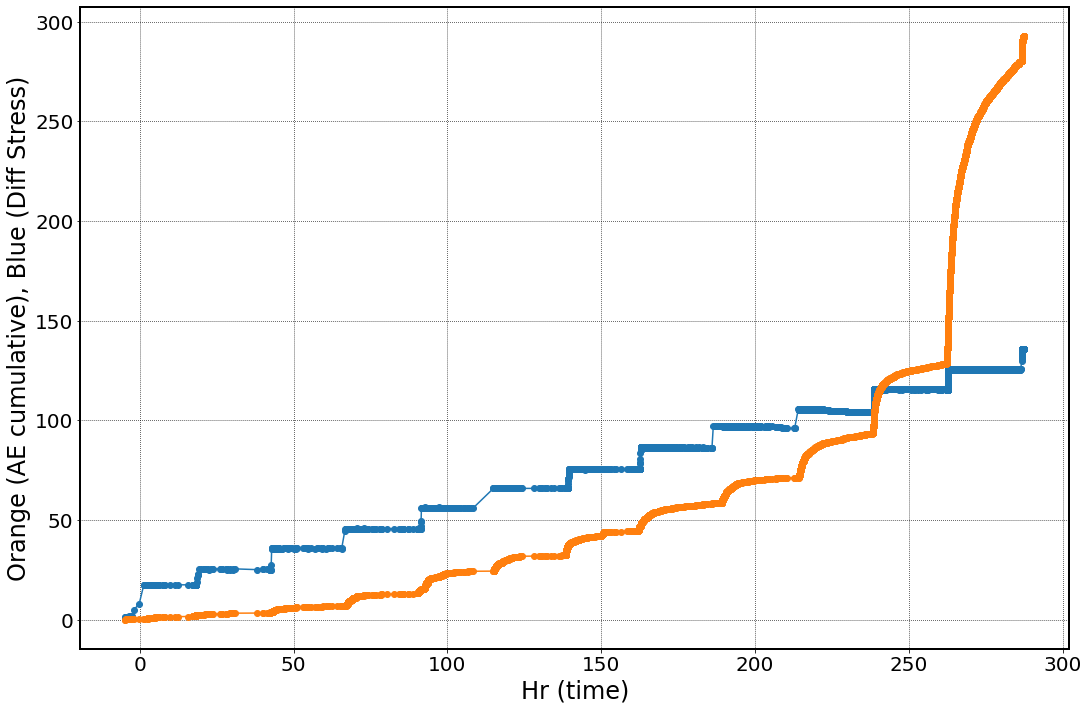

In [12]:
plt.plot(data.time_hr,data.Sig_diff_MPa,'o-')
plt.plot(data.time_hr,np.cumsum(data['count'])/30.,'o-')
plt.xlabel('Hr (time)')
plt.ylabel('Orange (AE cumulative), Blue (Diff Stress)')

## Check Synchronization

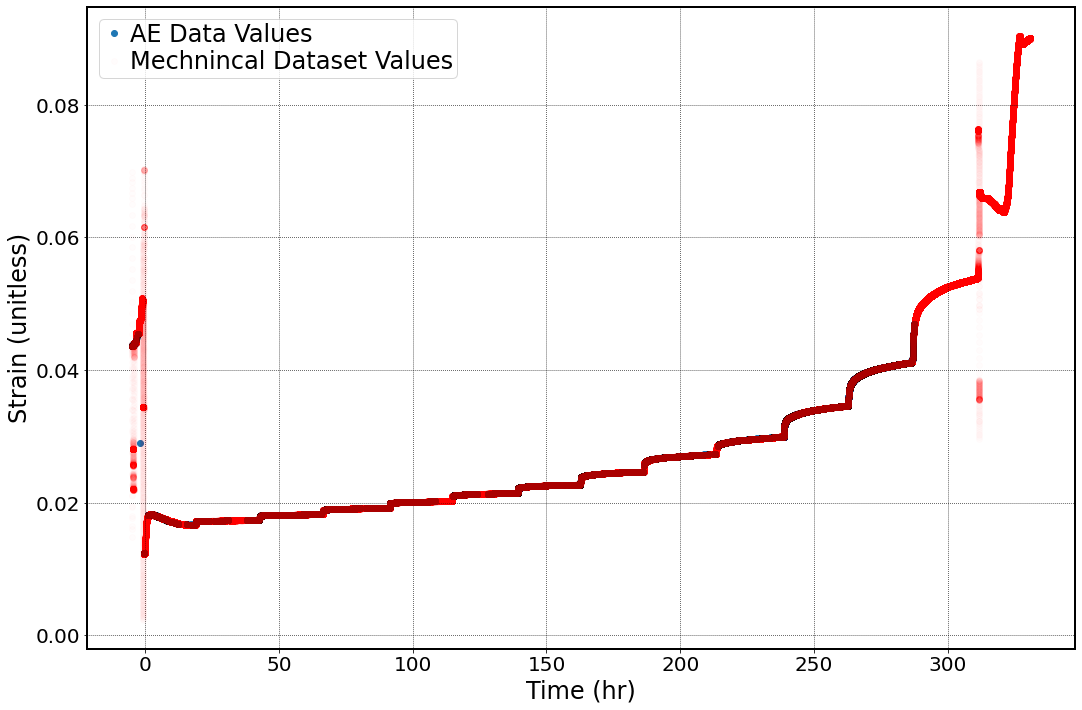

In [13]:
plt.plot(new_data.time_hr,new_data.Strain_ax,'o',label='AE Data Values')
plt.plot(new_data_def.time_hr,new_data_def.Strain_ax,'ro',alpha=0.01,label='Mechnincal Dataset Values') 
#plt.xlim([5,10])
plt.xlabel('Time (hr)')
plt.ylabel('Strain (unitless)')
plt.legend()
#plt.ylim([0.,0.01])

Text(0.5, 0, 'Time (Date)')

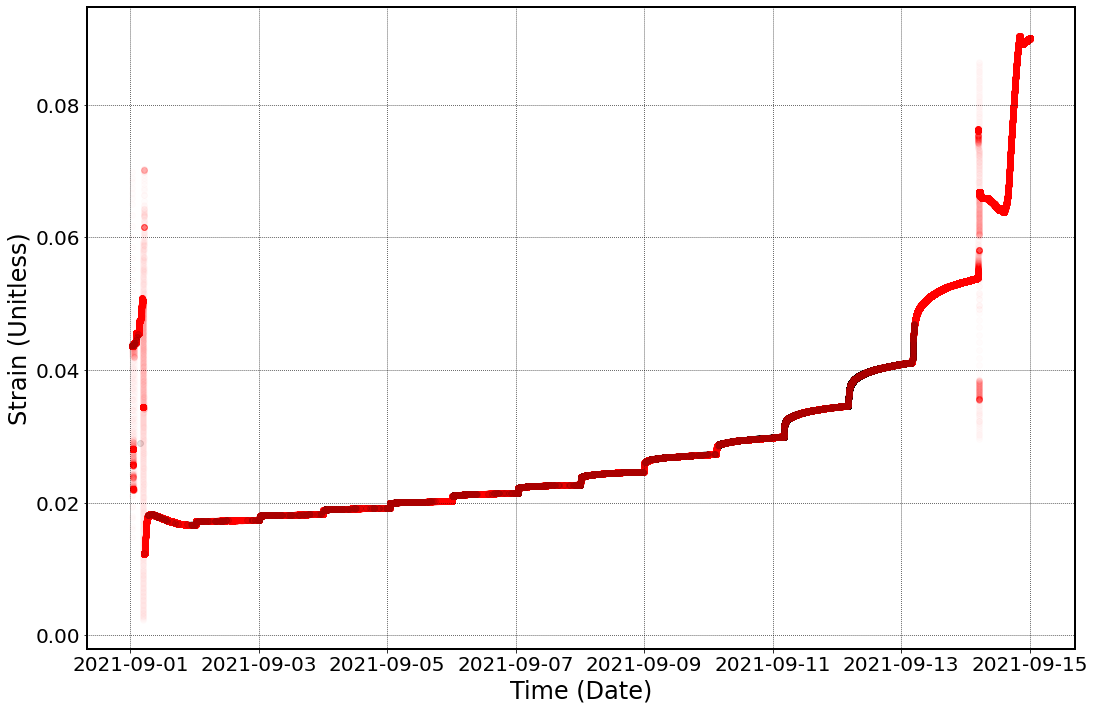

In [14]:
plt.plot(new_data.index,new_data['Strain_ax'],'ko',alpha=.1)
plt.plot(new_data_def.index,new_data_def['Strain_ax'],'ro',alpha=0.01)
plt.ylabel('Strain (Unitless)')
plt.xlabel('Time (Date)')
#plt.xlim([np.datetime64('2020-02-19'),np.datetime64('2020-02-20')])
#plt.ylim([0,0.01])
#plt.tight_layout()

### Final Cleaned, Aligned Datasets 

In [15]:
### AE dataset & deformation data with time as the index
# new_data -- AE Data
# new_data_def -- Deformation Data (resampled)

new_data = new_data.loc[new_data['time_hr']>=0,:] ## Only choosing the "reasonable" data part

#### Time region cutoff to ensure that both the datasets are comparable

In [16]:
start_date = np.max([new_data_def.index.values[0],new_data.index.values[0]])
end_date = np.min([new_data_def.index.values[-1],new_data.index.values[-1]])
print(f'{start_date}, {end_date}')

2021-09-01T06:47:10.000000000, 2021-09-13T04:59:50.000000000


## Analysis Parts :

a) Make a catalog for the AE data with strain rate etc (extended mechanical catalog)

b) Data plotting with different time aggregations & saving time series for analysis

### Make a time aggregated dataset (mechanical data) to merge with the event catalog

In [17]:
time_window = 60  ## Aggregation Time Window in seconds

In [18]:
time_agg = str(int(time_window/60)) + 'min'
new_data_def_Sampl = hbasic.generate_data(new_data,new_data_def,time_window,start_date,end_date)
new_AE_data = pd.merge_asof(new_data, new_data_def_Sampl, left_index = True, right_index = True,
                            direction='forward',tolerance=pd.Timedelta(seconds=time_window),
             suffixes =['','_1min'])
## Note that when we aggregate, the time label is assigned to the end of the time window (right). So, for an event,
#  the relevant data is in the next timestamp (or not relevant - so we have a tolerance) ..

In [19]:
new_AE_data.to_csv(path_AE_data.split('.csv')[0]+'_AppendedMechanical_'+time_agg+'.csv')

In [20]:
new_AE_data.columns

Index(['index', 'Unnamed: 0', 'timestamp', 'evID', 'Disp_mm', 'Sig_diff_MPa',
       'P_confining', 'P_fluid', 'Strain_ax', 'time_hr', 'count',
       'Disp_mm_1min', 'Sig_diff_MPa_1min', 'P_confining_1min', 'P_fluid_1min',
       't_def', 'Strain_ax_1min', 'time_hr_1min', 'Time_Since_Step_1',
       'Time_Since_Step_2', 'Time_Since_Step_3', 'Time_Since_Step_4',
       'Time_Since_Step_5', 'Time_Since_Step_6', 'Time_Since_Step_7',
       'Time_Since_Step_8', 'Time_Since_Step_9', 'Time_Since_Step_10',
       'Time_Since_Step_11', 'Time_Since_Step_12', 'AE_rate_count',
       'strain_rate', 'stress_rate', 'AE_rate_count_rate', 'Sig_AE_rate',
       'strain_rate_AE_rate', 'strain_AE_rate', 'Sig_strain',
       'Sig_strain_rate', 'Strain_strain_rate'],
      dtype='object')

In [21]:
new_AE_data['AE_rate_count']

date
2021-09-01 06:47:10    3.0
2021-09-01 06:47:11    3.0
2021-09-01 06:47:30    3.0
2021-09-01 08:11:02    4.0
2021-09-01 08:11:23    4.0
                      ... 
2021-09-13 04:54:26    2.0
2021-09-13 04:54:29    2.0
2021-09-13 04:55:55    1.0
2021-09-13 04:59:17    NaN
2021-09-13 04:59:50    NaN
Name: AE_rate_count, Length: 8775, dtype: float64

In [23]:
time_window = 60
time_agg = str(int(time_window/60)) + 'min'
new_data_def_Sampl = hbasic.generate_data(new_data,new_data_def,time_window,start_date,end_date)
print(new_data_def_Sampl.columns)

%matplotlib qt
plt.plot(new_AE_data['time_hr'],new_AE_data['Sig_diff_MPa'],'o')
plt.plot(new_data_def_Sampl['time_hr'],new_data_def_Sampl['Sig_diff_MPa'],'k-',alpha=0.2)
plt.plot(new_AE_data['time_hr'],new_AE_data['Strain_ax']*3000,'ro')
plt.plot(new_data_def_Sampl['time_hr'],new_data_def_Sampl['Strain_ax']*3000,'r-',alpha=0.2)
plt.plot(new_data_def_Sampl['time_hr'],new_data_def_Sampl['AE_rate_count']*3,'b-')

Index(['Disp_mm', 'Sig_diff_MPa', 'P_confining', 'P_fluid', 't_def',
       'Strain_ax', 'time_hr', 'Time_Since_Step_1', 'Time_Since_Step_2',
       'Time_Since_Step_3', 'Time_Since_Step_4', 'Time_Since_Step_5',
       'Time_Since_Step_6', 'Time_Since_Step_7', 'Time_Since_Step_8',
       'Time_Since_Step_9', 'Time_Since_Step_10', 'Time_Since_Step_11',
       'Time_Since_Step_12', 'AE_rate_count', 'strain_rate', 'stress_rate',
       'AE_rate_count_rate', 'Sig_AE_rate', 'strain_rate_AE_rate',
       'strain_AE_rate', 'Sig_strain', 'Sig_strain_rate',
       'Strain_strain_rate'],
      dtype='object')


In [22]:
del new_AE_data

## Plotting/Analysis of the data with AE rate etc 

In [23]:
try  :
    os.mkdir(path_to_save_out_time_series+name_exp)
except :
    print(f' {path_to_save_out_time_series+name_exp} Exists')
    
try  :
    os.mkdir(path_to_save_out_time_series+name_exp+'/'+time_agg)
except :
    print(f"{path_to_save_out_time_series+name_exp+'/'+time_agg} Exists")

path_save_file = path_to_save_out_time_series+name_exp+'/'+time_agg

 /home/tmittal/Causality/Basalt_Data/dataforcausalitytests_CO2_Wet_Basalt_Open Exists
/home/tmittal/Causality/Basalt_Data/dataforcausalitytests_CO2_Wet_Basalt_Open/1min Exists


In [24]:
new_data_def_Sampl.time_hr

date
2021-09-01 06:48:00      1.279861
2021-09-01 06:49:00      1.296528
2021-09-01 06:50:00      1.313194
2021-09-01 06:51:00      1.329861
2021-09-01 06:52:00      1.346528
                          ...    
2021-09-13 04:55:00    287.396528
2021-09-13 04:56:00    287.413194
2021-09-13 04:57:00    287.429861
2021-09-13 04:58:00    287.446528
2021-09-13 04:59:00    287.463194
Freq: 60S, Name: time_hr, Length: 17172, dtype: float64

Index(['Disp_mm', 'Sig_diff_MPa', 'P_confining', 'P_fluid', 't_def',
       'Strain_ax', 'time_hr', 'Time_Since_Step_1', 'Time_Since_Step_2',
       'Time_Since_Step_3', 'Time_Since_Step_4', 'Time_Since_Step_5',
       'Time_Since_Step_6', 'Time_Since_Step_7', 'Time_Since_Step_8',
       'Time_Since_Step_9', 'Time_Since_Step_10', 'Time_Since_Step_11',
       'Time_Since_Step_12', 'AE_rate_count', 'strain_rate', 'stress_rate',
       'AE_rate_count_rate', 'Sig_AE_rate', 'strain_rate_AE_rate',
       'strain_AE_rate', 'Sig_strain', 'Sig_strain_rate',
       'Strain_strain_rate'],
      dtype='object')
Output_Plots Exists
Output_Plots/CO2_Wet_Basalt_Open Exists
Index value for the stress steps:  [ 1056  1064  2494  3922  5416  6812  8289  9691 11109 12733 14249 15693
 17133]
Time(hr) for the stress steps:  [ 18.87986111  42.84652778  66.64652778  91.54652778 114.81319444
 139.42986111 162.79652778 186.42986111 213.49652778 238.76319444
 262.82986111 286.82986111]


35

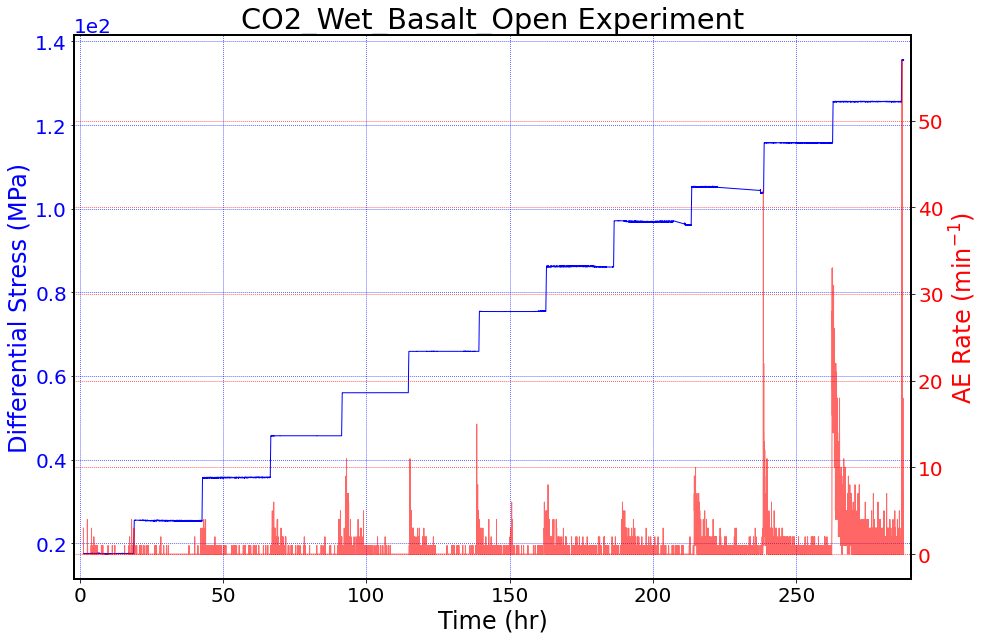

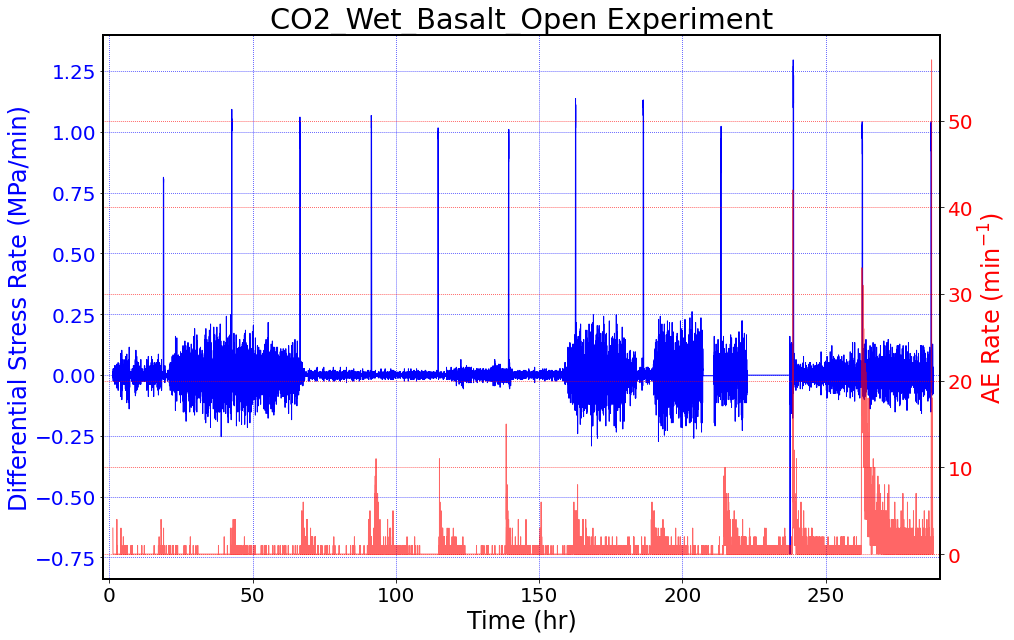

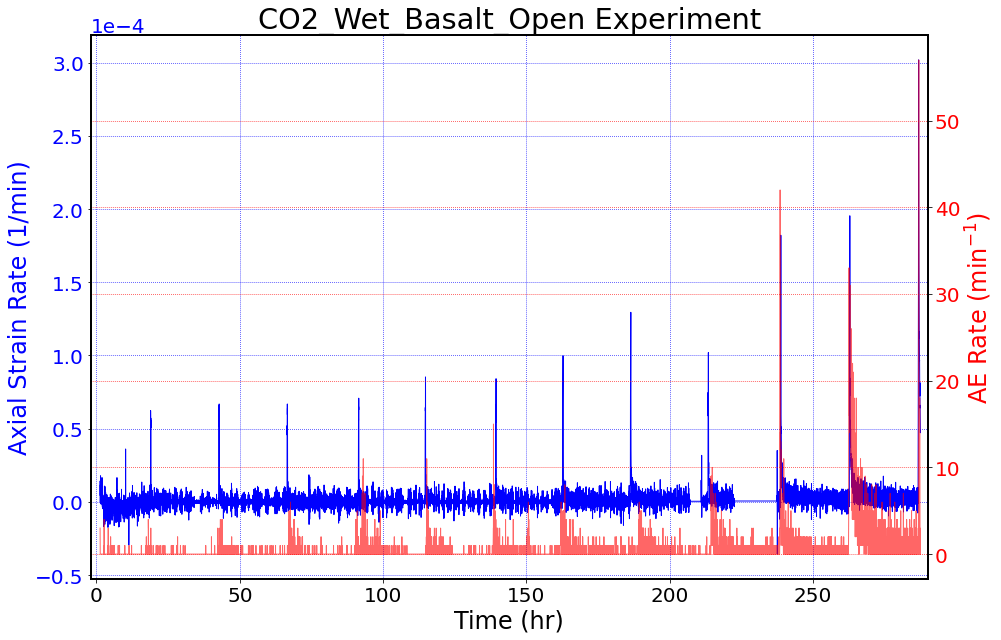

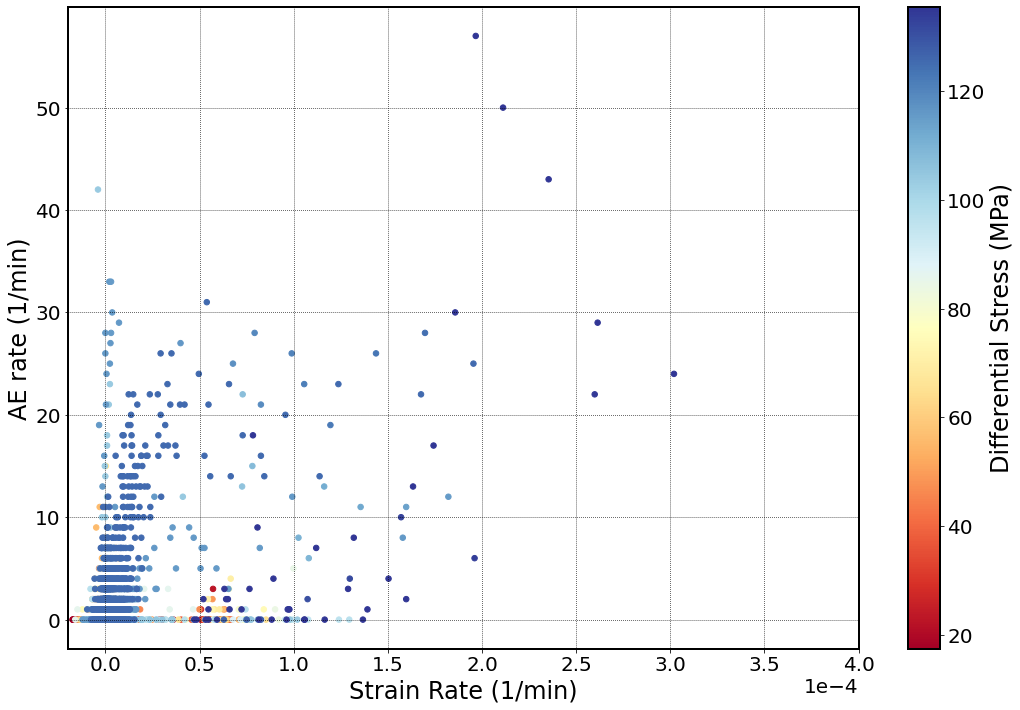

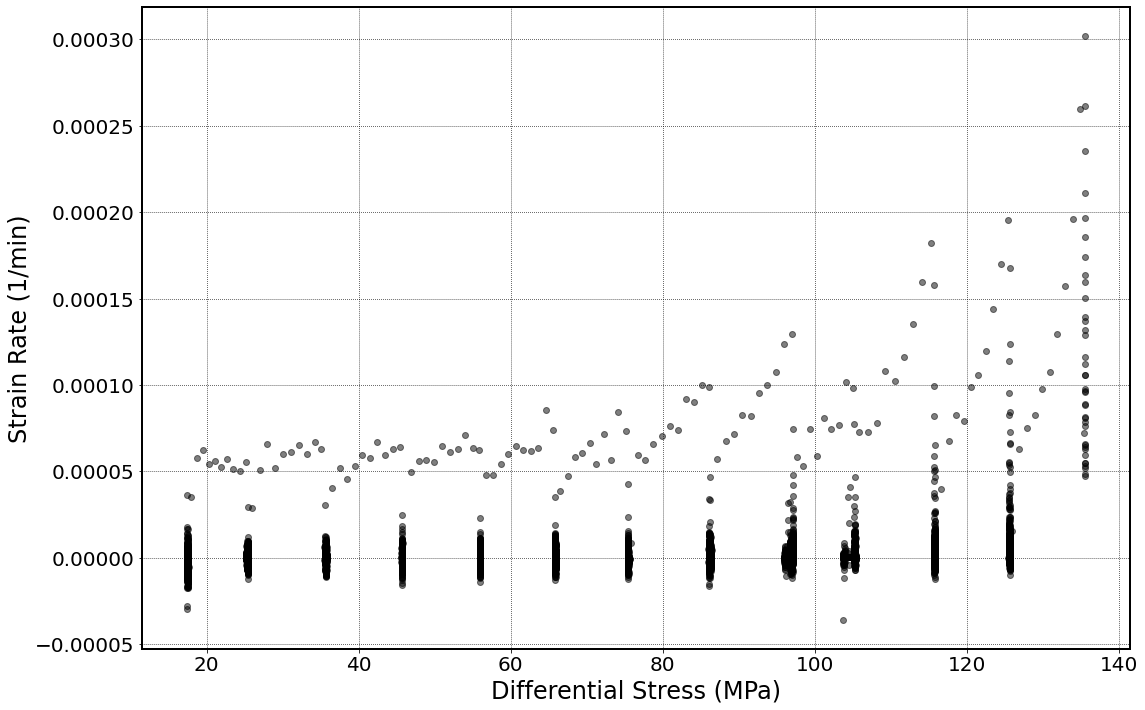

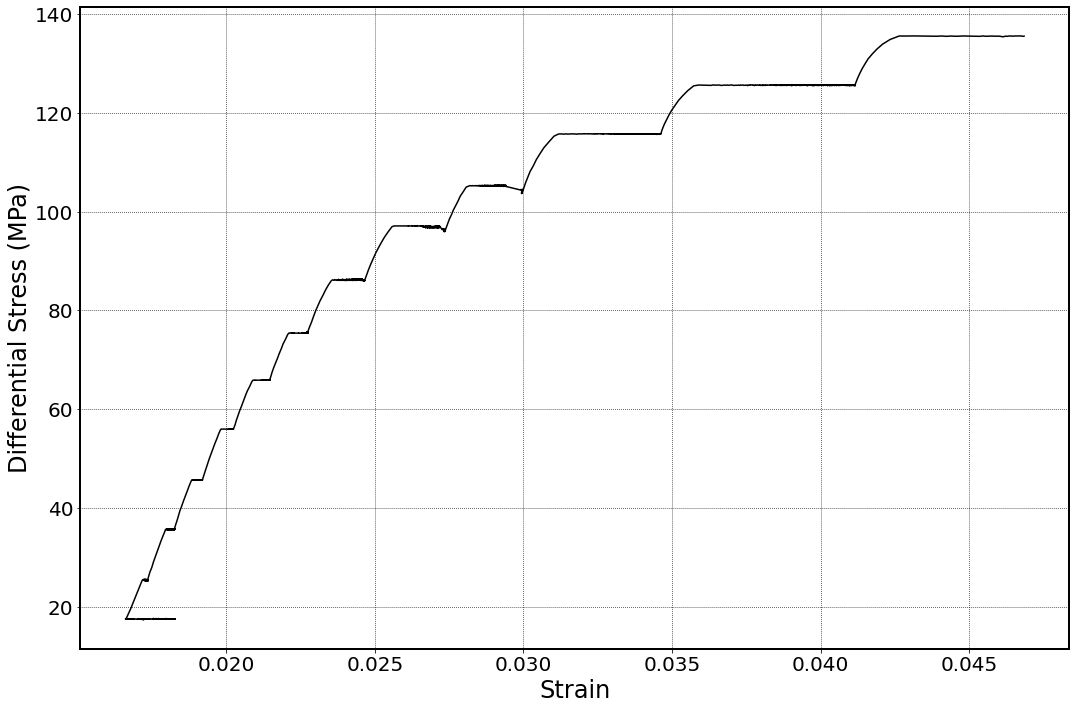

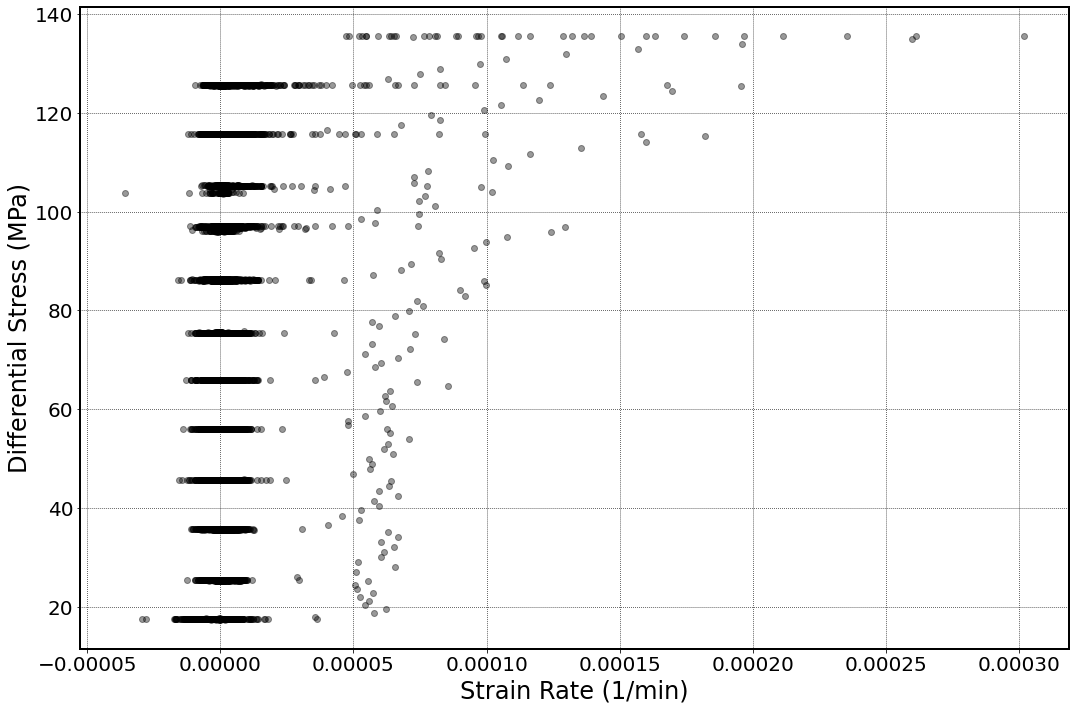

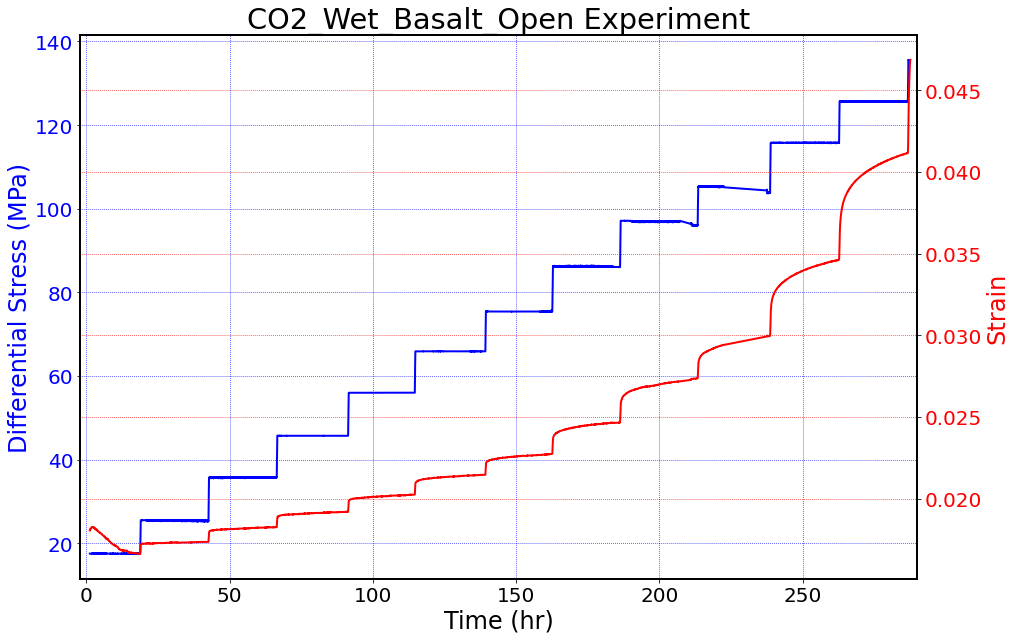

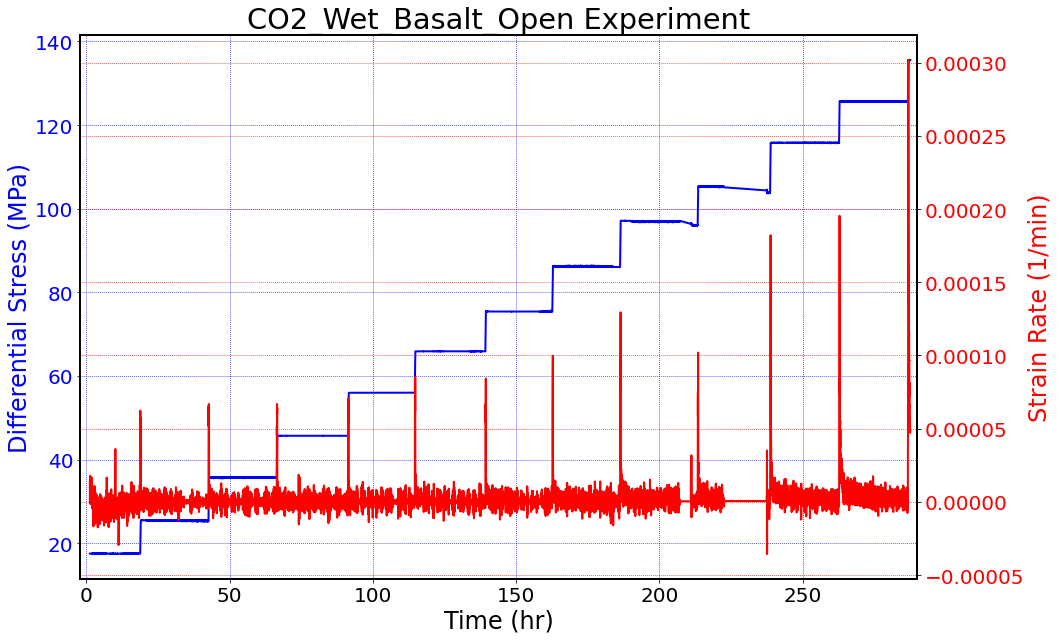

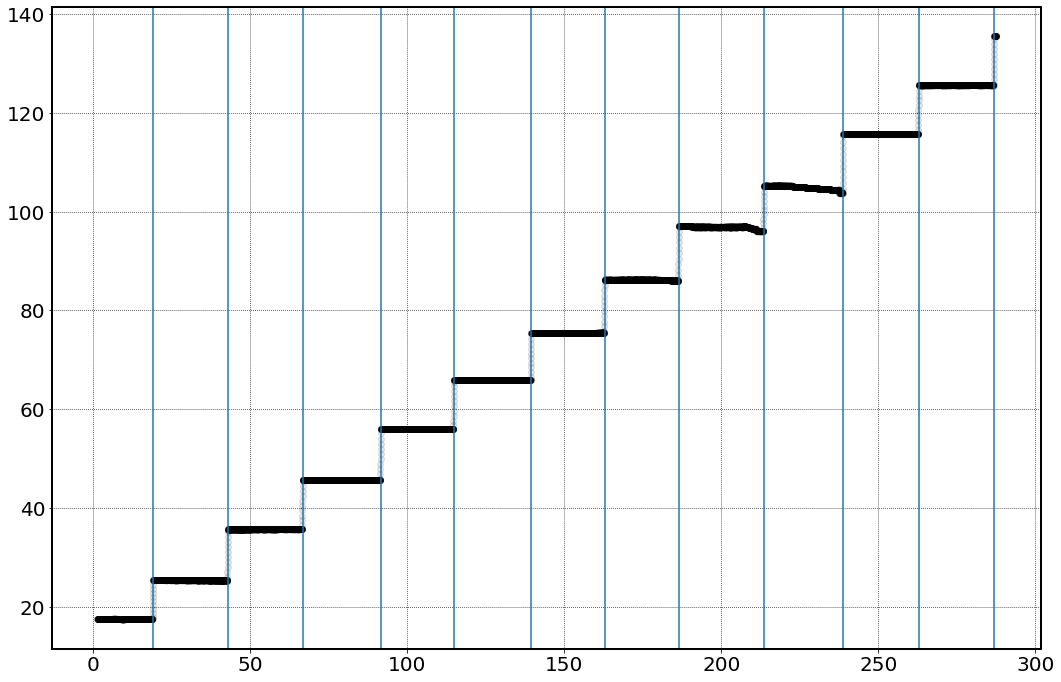

In [27]:
time_window = 60
time_agg = str(int(time_window/60)) + 'min'
new_data_def_Sampl = hbasic.generate_data(new_data,new_data_def,time_window,start_date,end_date)
print(new_data_def_Sampl.columns)
   
#new_data_def_Sampl = new_data_def_Sampl.loc[new_data_def_Sampl['time_hr']<=138.,:]
hbasic.make_plots_exp_Dataset(new_data_def_Sampl,name_exp,time_window,max_val=290,Temperature=False)

### Finding the steps in the stress based on stress rate
grad_stress = new_data_def_Sampl['stress_rate']
pot_steps = np.where(grad_stress>0.5)[0]
indx = np.hstack([0,np.where(np.diff(new_data_def_Sampl.time_hr[pot_steps])>5)[0],-1])
print('Index value for the stress steps: ' ,pot_steps[indx])
indx = np.hstack([indx[0],indx[2:]])
time_steps = new_data_def_Sampl.time_hr[pot_steps[indx]].reset_index(drop=True)
print('Time(hr) for the stress steps: ',time_steps.values)

plt.figure()
plt.plot(new_data_def_Sampl.time_hr,new_data_def_Sampl.Sig_diff_MPa,'-ko',linewidth=0.1,alpha=0.1)
for k in pot_steps[indx]:
    plt.axvline(x=new_data_def_Sampl.time_hr[k])

# import gc
# gc.collect()

scaled_data1 = MinMaxScaler().fit_transform(new_data_def_Sampl)
scaled_data2 = RobustScaler().fit_transform(new_data_def_Sampl)

hbasic.make_file(new_data_def_Sampl,scaled_data1,path_save_file+'MinMax')
hbasic.make_file(new_data_def_Sampl,scaled_data2,path_save_file+'Robust')
del new_data_def_Sampl;
#plt.xlim([40,50.])
gc.collect()


Index(['Disp_mm', 'Sig_diff_MPa', 'P_confining', 'P_fluid', 't_def',
       'Strain_ax', 'time_hr', 'Time_Since_Step_1', 'Time_Since_Step_2',
       'Time_Since_Step_3', 'Time_Since_Step_4', 'Time_Since_Step_5',
       'Time_Since_Step_6', 'Time_Since_Step_7', 'Time_Since_Step_8',
       'Time_Since_Step_9', 'Time_Since_Step_10', 'Time_Since_Step_11',
       'Time_Since_Step_12', 'AE_rate_count', 'strain_rate', 'stress_rate',
       'AE_rate_count_rate', 'Sig_AE_rate', 'strain_rate_AE_rate',
       'strain_AE_rate', 'Sig_strain', 'Sig_strain_rate',
       'Strain_strain_rate'],
      dtype='object')
Output_Plots Exists
Output_Plots/CO2_Wet_Basalt_Open Exists
Index value for the stress steps:  [ 528  533 1247 1962 2708 3407 4145 4846 5555 6367 7125 7847 8567]
Time(hr) for the stress steps:  [ 18.87152778  42.83819444  66.67152778  91.53819444 114.83819444
 139.43819444 162.80486111 186.43819444 213.50486111 238.77152778
 262.83819444 286.83819444]


46696

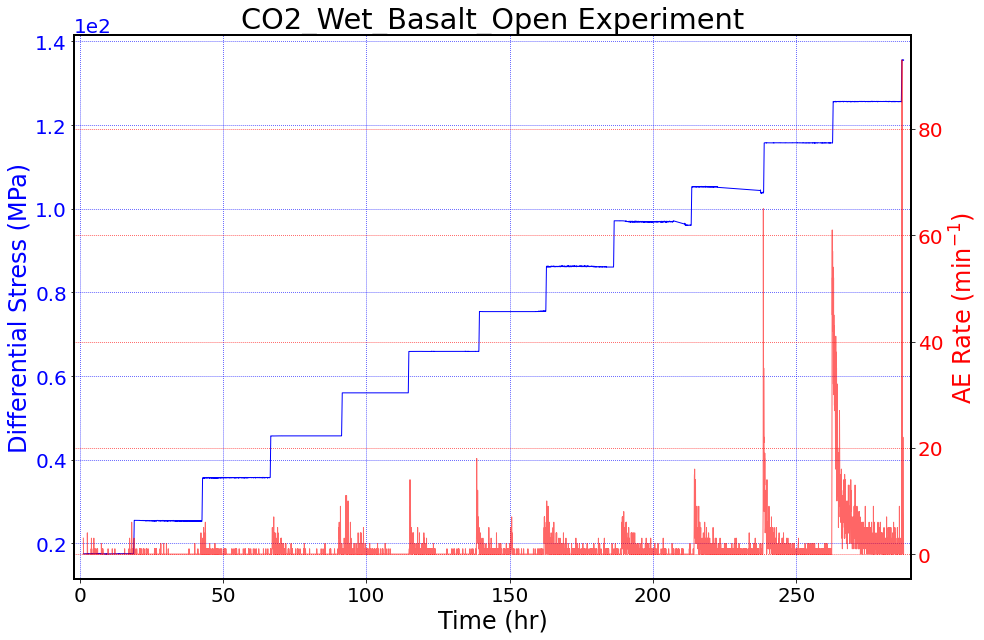

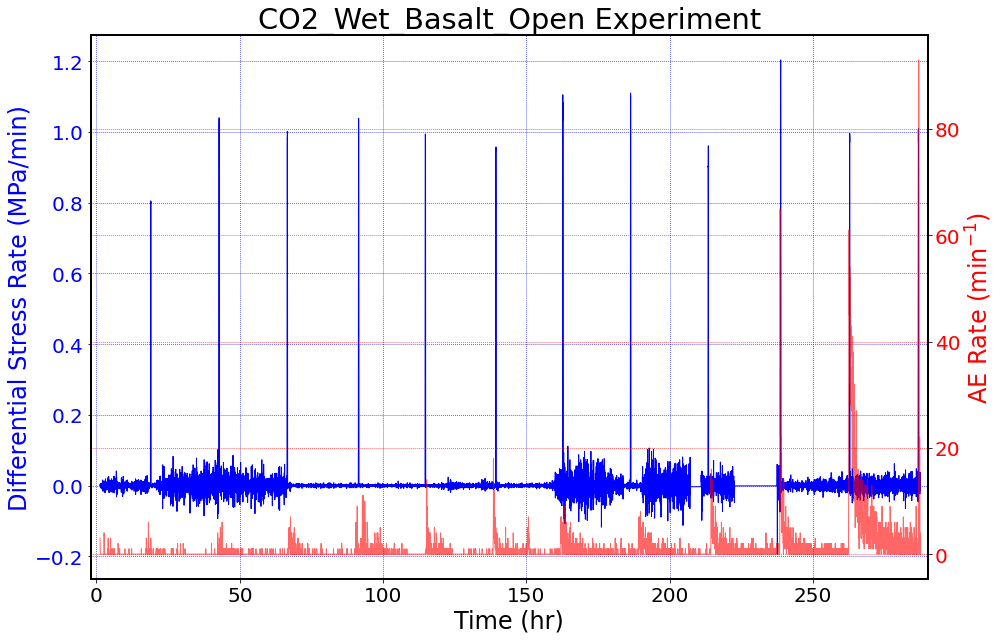

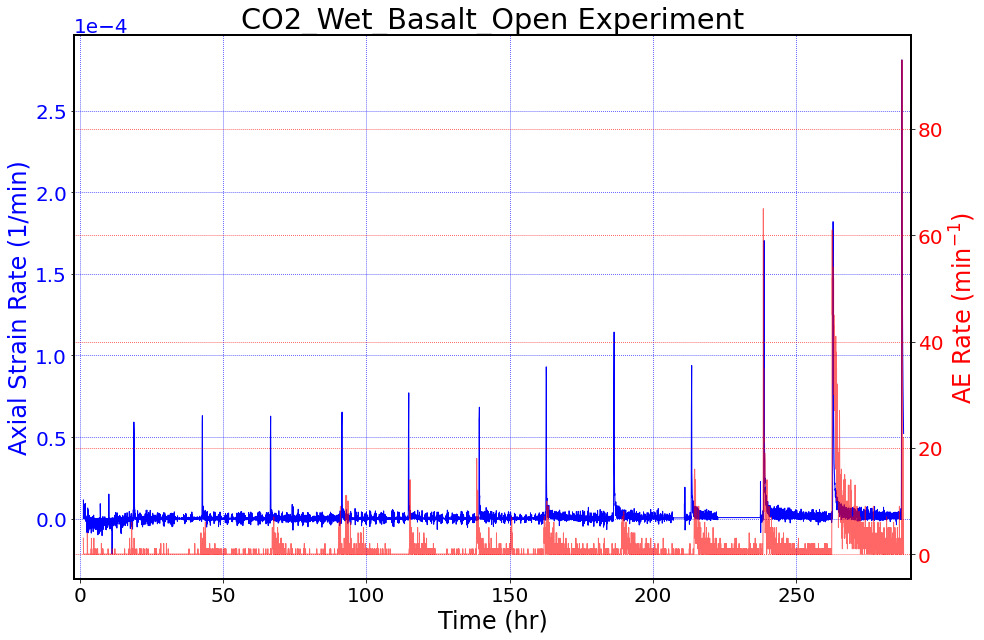

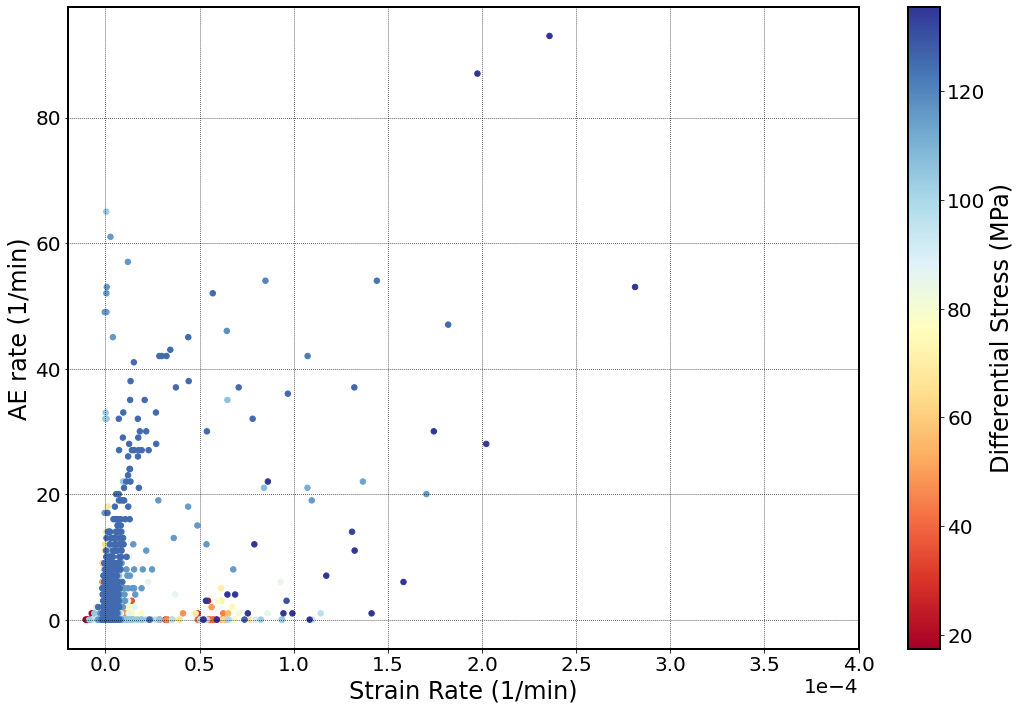

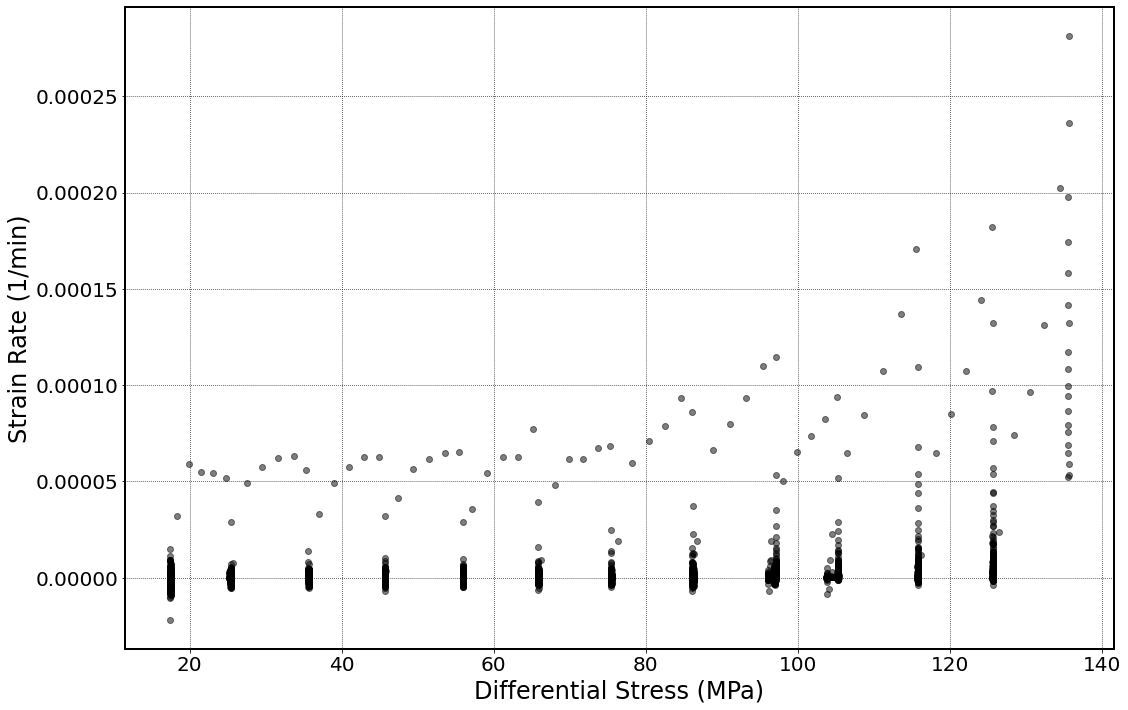

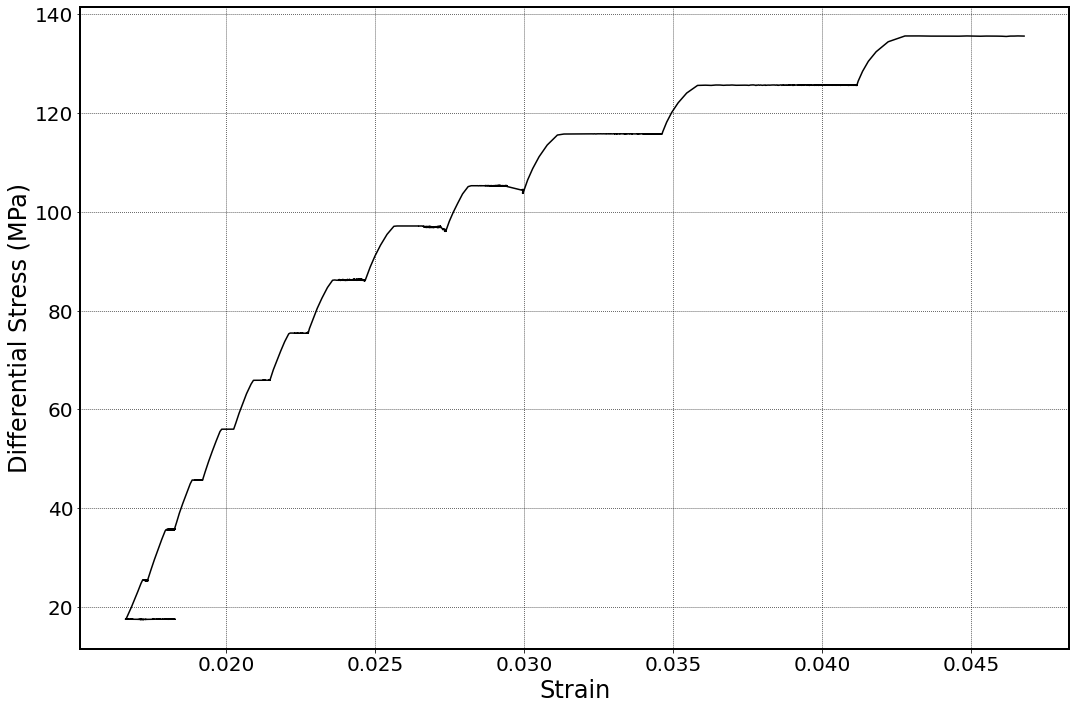

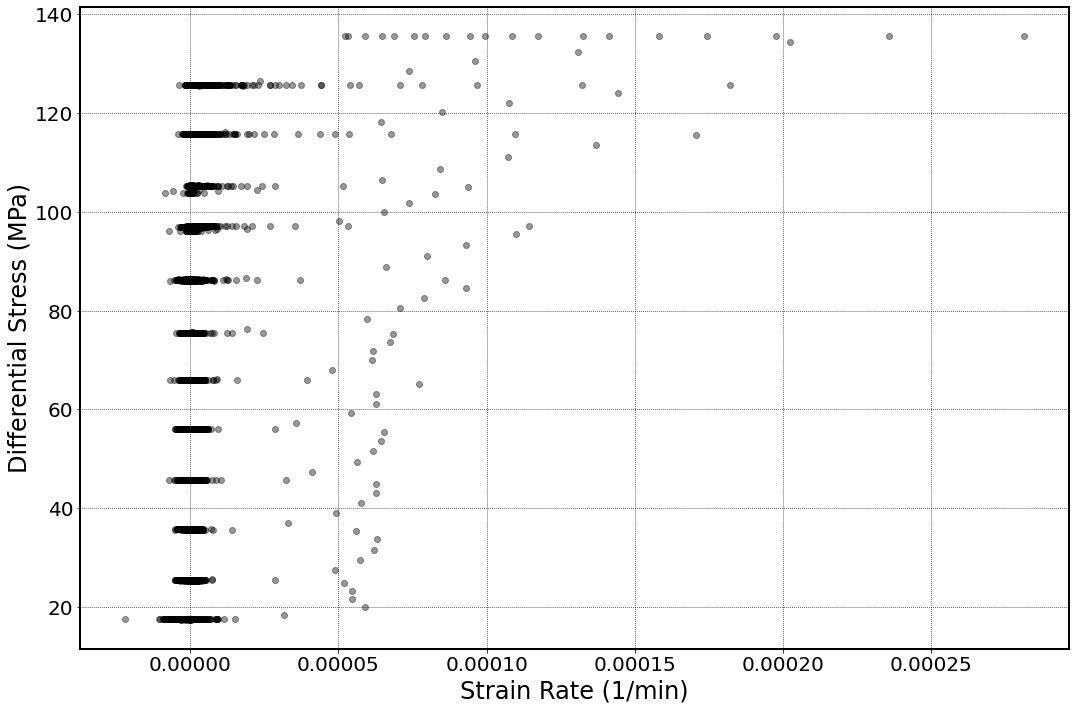

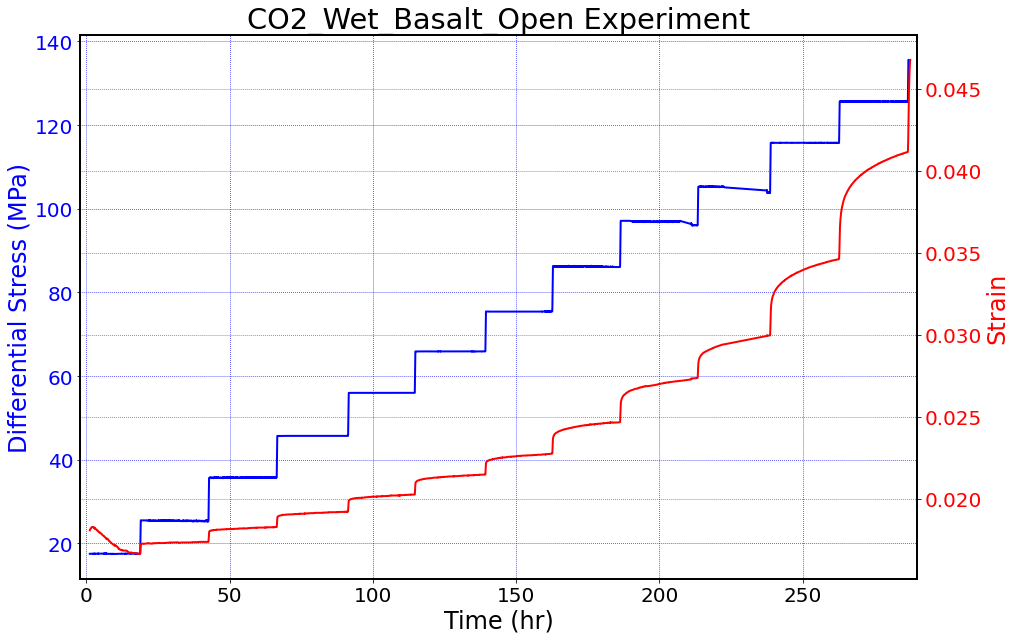

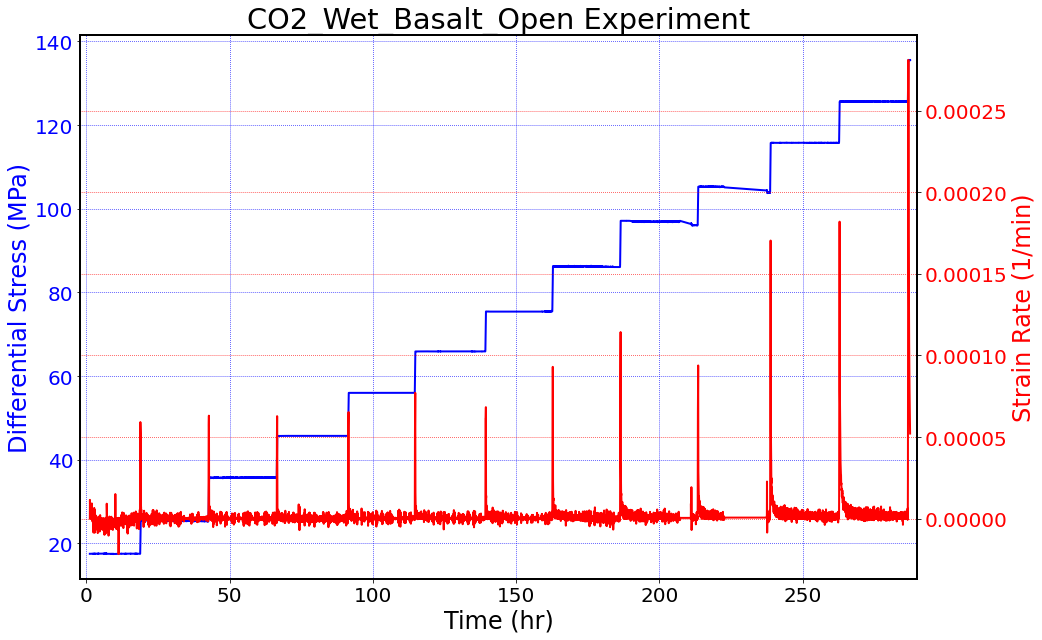

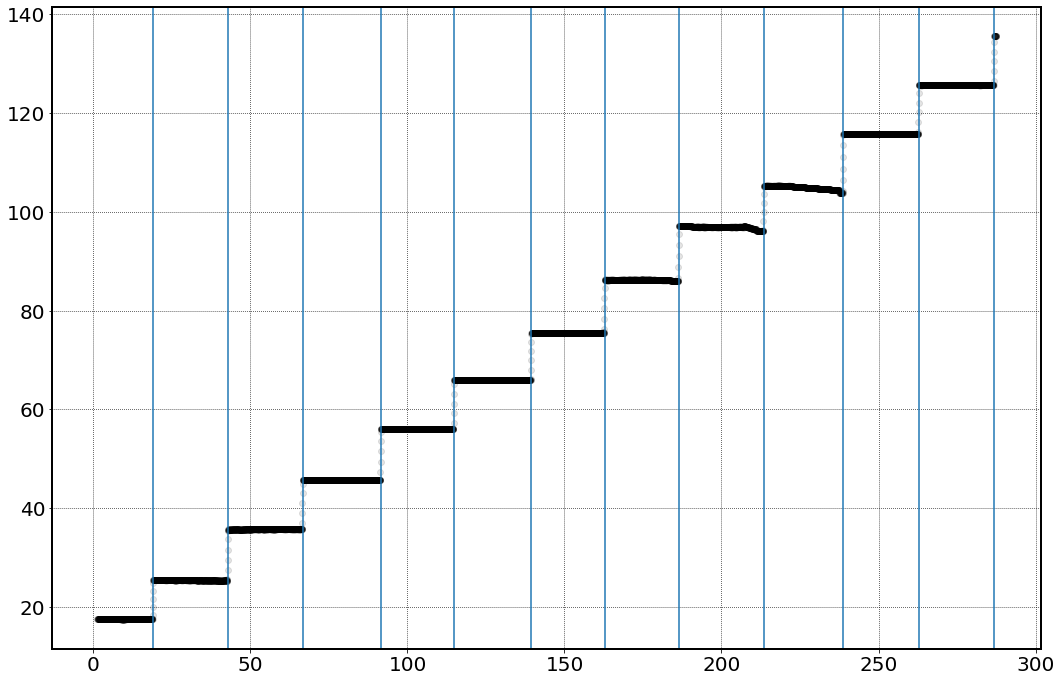

In [28]:
time_window = 120
time_agg = str(int(time_window/60)) + 'min'
new_data_def_Sampl = hbasic.generate_data(new_data,new_data_def,time_window,start_date,end_date)
print(new_data_def_Sampl.columns)
   
#new_data_def_Sampl = new_data_def_Sampl.loc[new_data_def_Sampl['time_hr']<=138.,:]
hbasic.make_plots_exp_Dataset(new_data_def_Sampl,name_exp,time_window,max_val=290,Temperature=False)

### Finding the steps in the stress based on stress rate
grad_stress = new_data_def_Sampl['stress_rate']
pot_steps = np.where(grad_stress>0.25)[0]
indx = np.hstack([0,np.where(np.diff(new_data_def_Sampl.time_hr[pot_steps])>5)[0],-1])
print('Index value for the stress steps: ' ,pot_steps[indx])
indx = np.hstack([indx[0],indx[2:]])
time_steps = new_data_def_Sampl.time_hr[pot_steps[indx]].reset_index(drop=True)
print('Time(hr) for the stress steps: ',time_steps.values)

plt.figure()
plt.plot(new_data_def_Sampl.time_hr,new_data_def_Sampl.Sig_diff_MPa,'-ko',linewidth=0.1,alpha=0.1)
for k in pot_steps[indx]:
    plt.axvline(x=new_data_def_Sampl.time_hr[k])

    
# import gc
# gc.collect()

scaled_data1 = MinMaxScaler().fit_transform(new_data_def_Sampl)
scaled_data2 = RobustScaler().fit_transform(new_data_def_Sampl)

hbasic.make_file(new_data_def_Sampl,scaled_data1,path_save_file+'MinMax')
hbasic.make_file(new_data_def_Sampl,scaled_data2,path_save_file+'Robust')
del new_data_def_Sampl;

gc.collect()


Index(['Disp_mm', 'Sig_diff_MPa', 'P_confining', 'P_fluid', 't_def',
       'Strain_ax', 'time_hr', 'Time_Since_Step_1', 'Time_Since_Step_2',
       'Time_Since_Step_3', 'Time_Since_Step_4', 'Time_Since_Step_5',
       'Time_Since_Step_6', 'Time_Since_Step_7', 'Time_Since_Step_8',
       'Time_Since_Step_9', 'Time_Since_Step_10', 'Time_Since_Step_11',
       'Time_Since_Step_12', 'AE_rate_count', 'strain_rate', 'stress_rate',
       'AE_rate_count_rate', 'Sig_AE_rate', 'strain_rate_AE_rate',
       'strain_AE_rate', 'Sig_strain', 'Sig_strain_rate',
       'Strain_strain_rate'],
      dtype='object')
Output_Plots Exists
Output_Plots/CO2_Wet_Basalt_Open Exists
Index value for the stress steps:  [ 353  355  832 1308 1806 2271 2764 3231 3704 4245 4750 5232 5712]
Time(hr) for the stress steps:  [ 18.91319444  42.86319444  66.66319444  91.56319444 114.81319444
 139.46319444 162.81319444 186.46319444 213.51319444 238.76319444
 262.86319444 286.86319444]


45676

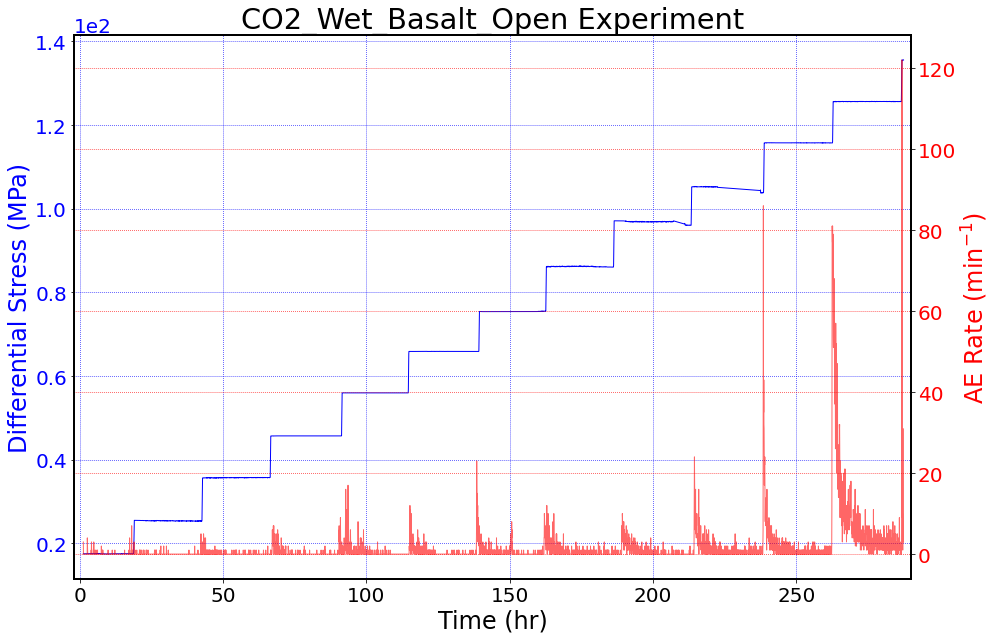

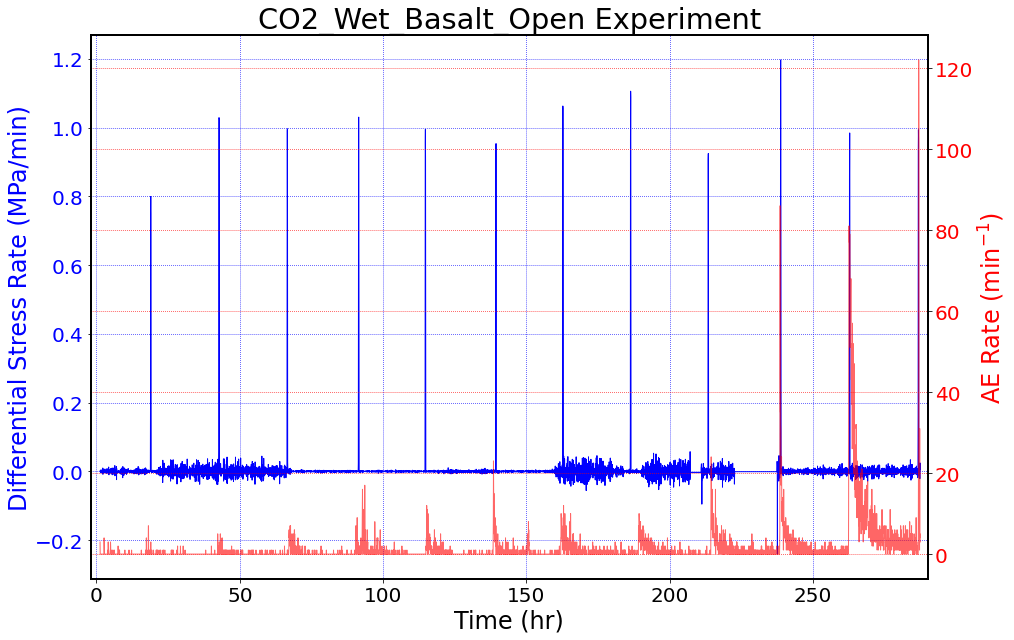

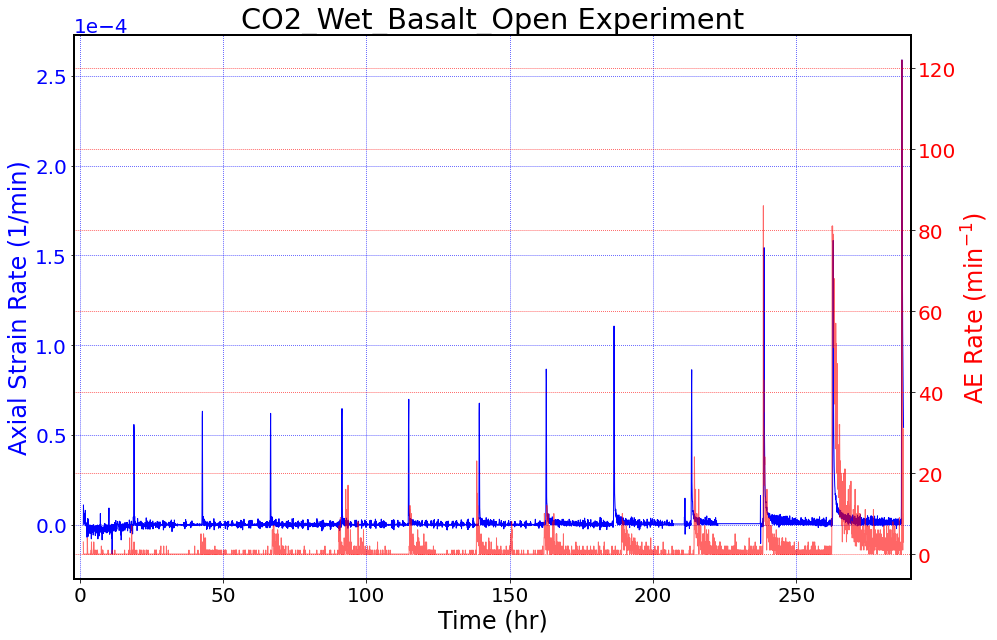

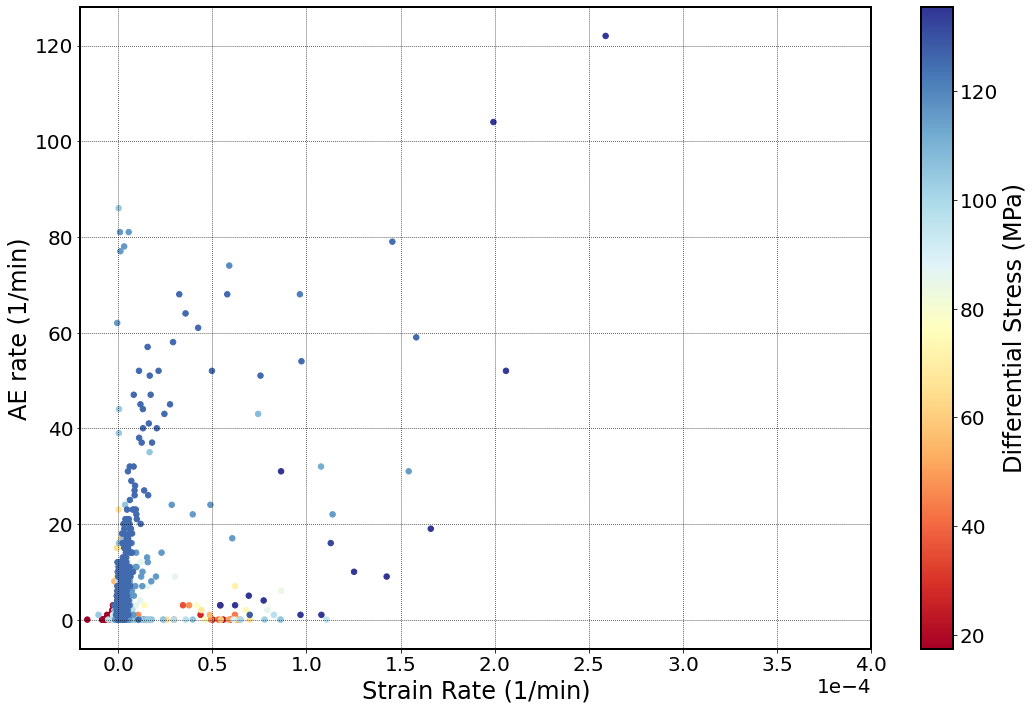

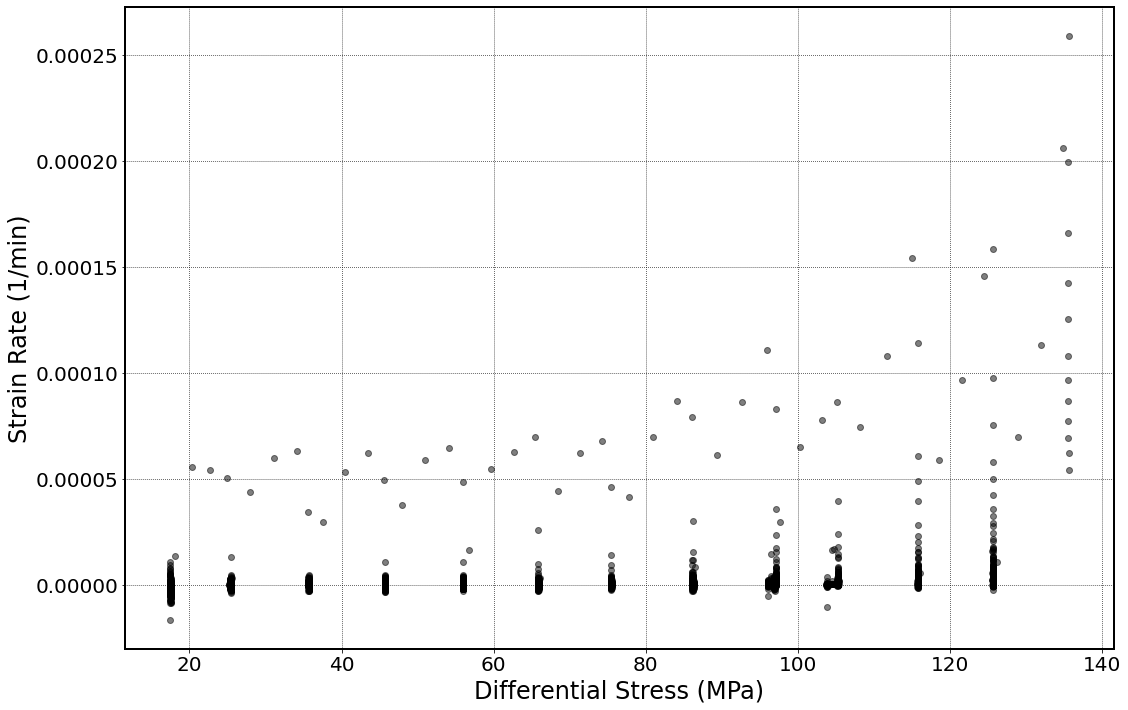

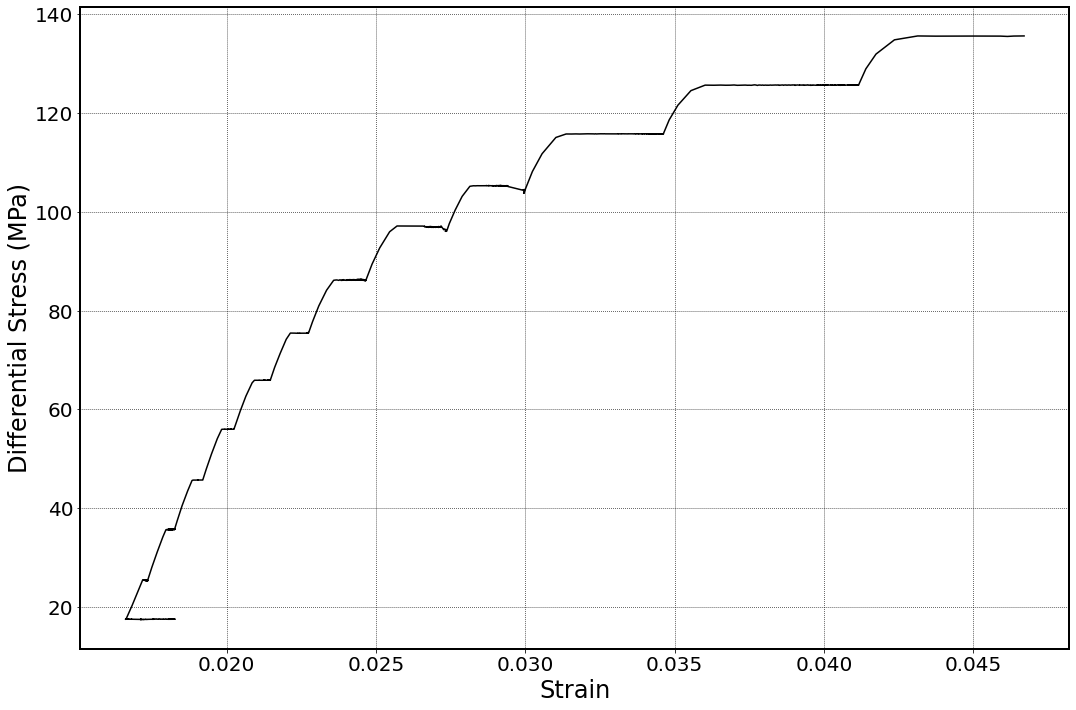

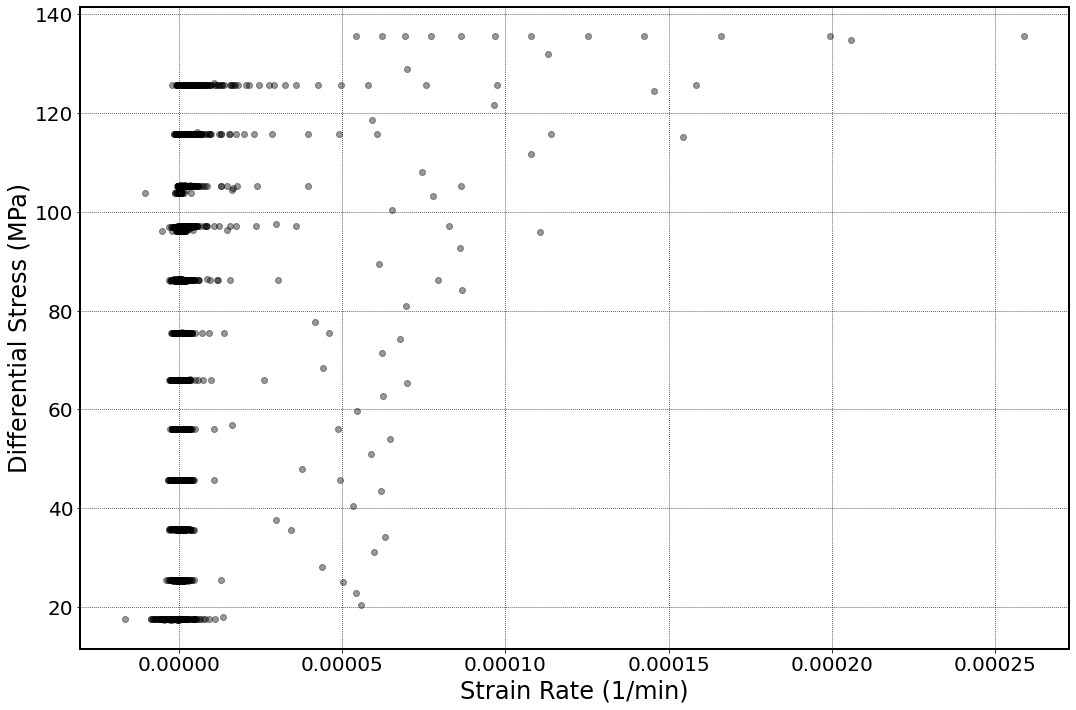

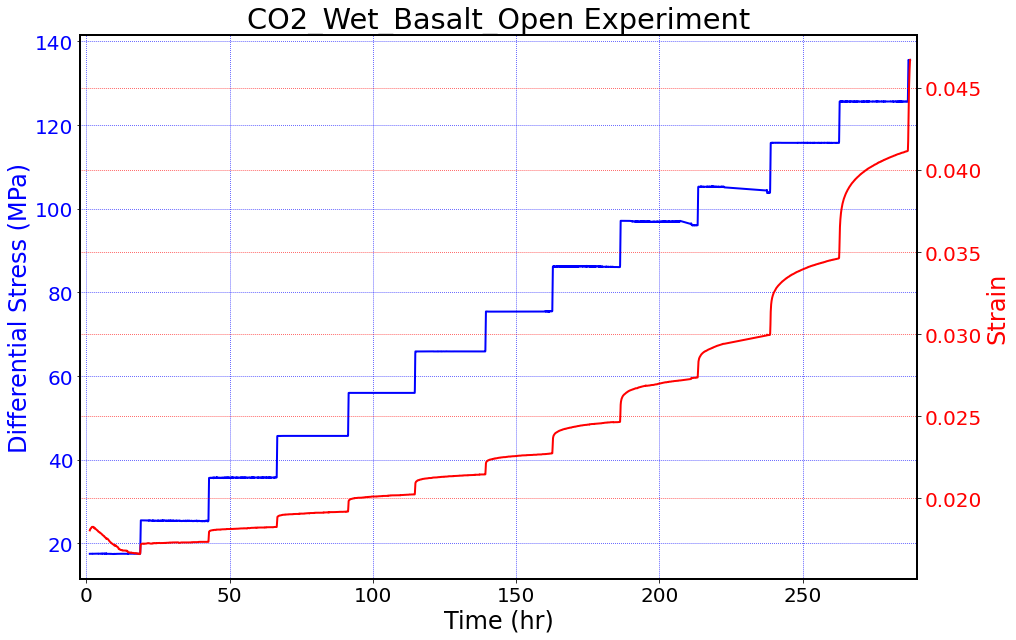

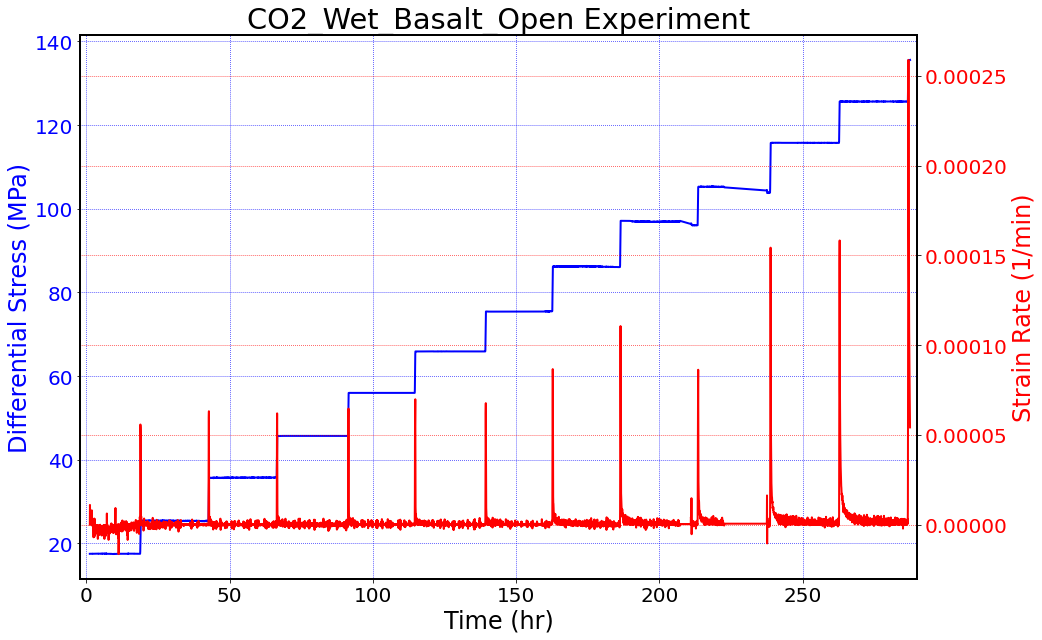

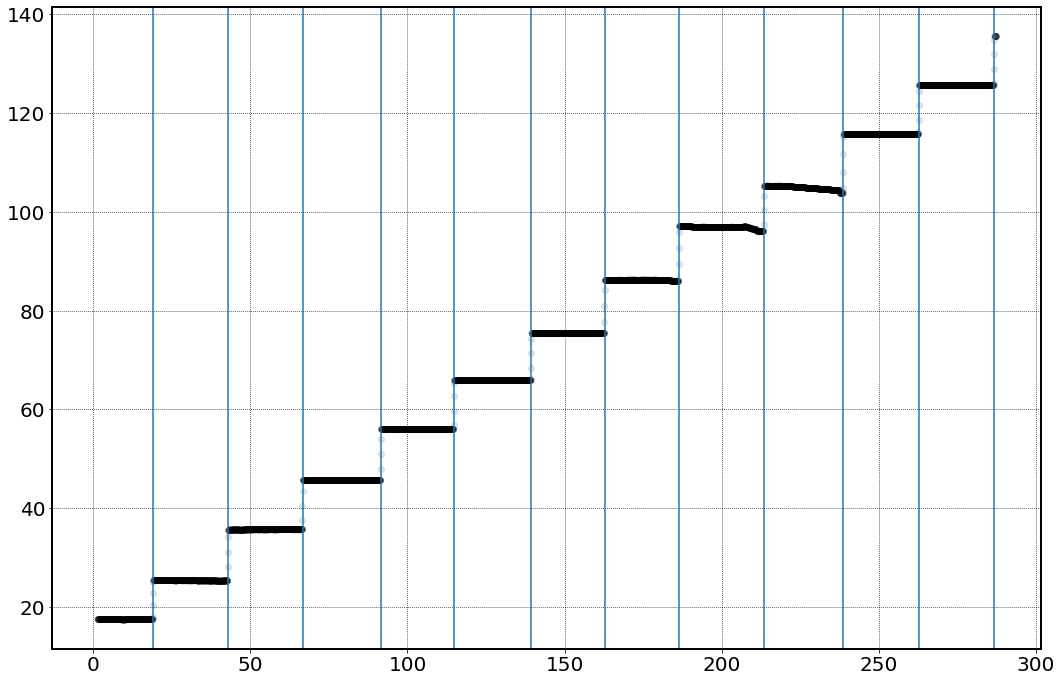

In [29]:
time_window = 180
time_agg = str(int(time_window/60)) + 'min'
new_data_def_Sampl = hbasic.generate_data(new_data,new_data_def,time_window,start_date,end_date)
print(new_data_def_Sampl.columns)
   
#new_data_def_Sampl = new_data_def_Sampl.loc[new_data_def_Sampl['time_hr']<=138.,:]
hbasic.make_plots_exp_Dataset(new_data_def_Sampl,name_exp,time_window,max_val=290,Temperature=False)

### Finding the steps in the stress based on stress rate
grad_stress = new_data_def_Sampl['stress_rate']
pot_steps = np.where(grad_stress>0.25)[0]
indx = np.hstack([0,np.where(np.diff(new_data_def_Sampl.time_hr[pot_steps])>5)[0],-1])
print('Index value for the stress steps: ' ,pot_steps[indx])
indx = np.hstack([indx[0],indx[2:]])
time_steps = new_data_def_Sampl.time_hr[pot_steps[indx]].reset_index(drop=True)
print('Time(hr) for the stress steps: ',time_steps.values)

plt.figure()
plt.plot(new_data_def_Sampl.time_hr,new_data_def_Sampl.Sig_diff_MPa,'-ko',linewidth=0.1,alpha=0.1)
for k in pot_steps[indx]:
    plt.axvline(x=new_data_def_Sampl.time_hr[k])

    
# import gc
# gc.collect()

scaled_data1 = MinMaxScaler().fit_transform(new_data_def_Sampl)
scaled_data2 = RobustScaler().fit_transform(new_data_def_Sampl)

hbasic.make_file(new_data_def_Sampl,scaled_data1,path_save_file+'MinMax')
hbasic.make_file(new_data_def_Sampl,scaled_data2,path_save_file+'Robust')
del new_data_def_Sampl;

gc.collect()


Index(['Disp_mm', 'Sig_diff_MPa', 'P_confining', 'P_fluid', 't_def',
       'Strain_ax', 'time_hr', 'Time_Since_Step_1', 'Time_Since_Step_2',
       'Time_Since_Step_3', 'Time_Since_Step_4', 'Time_Since_Step_5',
       'Time_Since_Step_6', 'Time_Since_Step_7', 'Time_Since_Step_8',
       'Time_Since_Step_9', 'Time_Since_Step_10', 'Time_Since_Step_11',
       'Time_Since_Step_12', 'AE_rate_count', 'strain_rate', 'stress_rate',
       'AE_rate_count_rate', 'Sig_AE_rate', 'strain_rate_AE_rate',
       'strain_AE_rate', 'Sig_strain', 'Sig_strain_rate',
       'Strain_strain_rate'],
      dtype='object')
Output_Plots Exists
Output_Plots/CO2_Wet_Basalt_Open Exists
Index value for the stress steps:  [ 212  213  499  785 1083 1363 1658 1938 2222 2547 2850 3139 3427]
Time(hr) for the stress steps:  [ 18.94652778  42.86319444  66.69652778  91.52986111 114.86319444
 139.44652778 162.77986111 186.44652778 213.52986111 238.77986111
 262.86319444 286.86319444]


46349

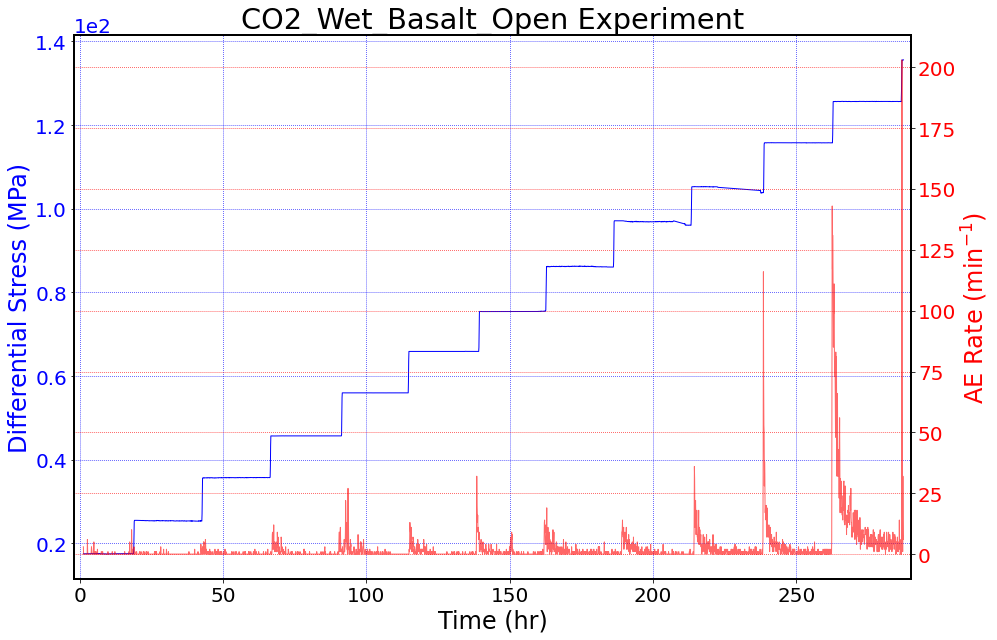

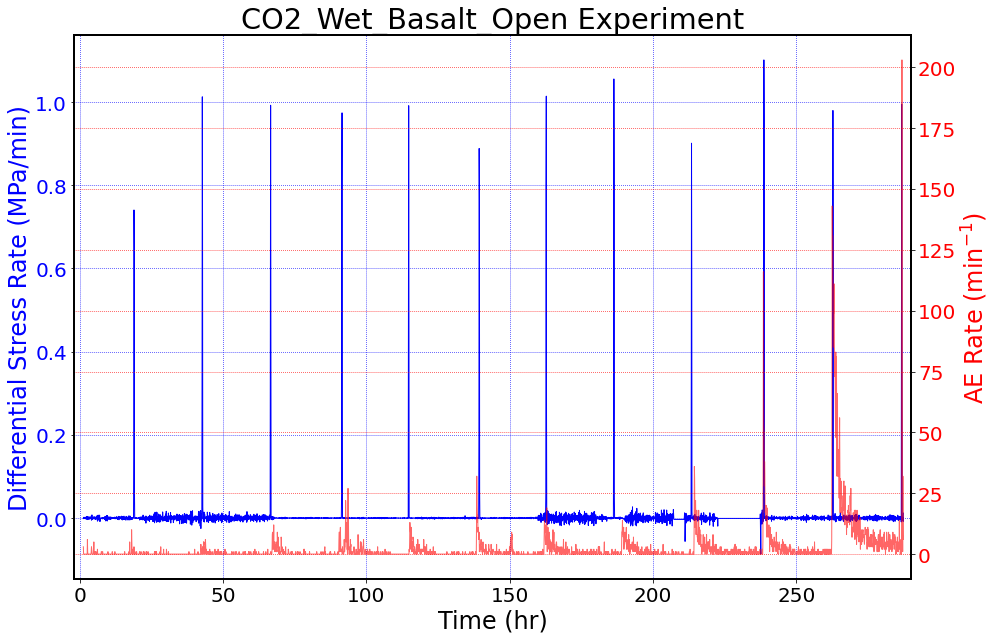

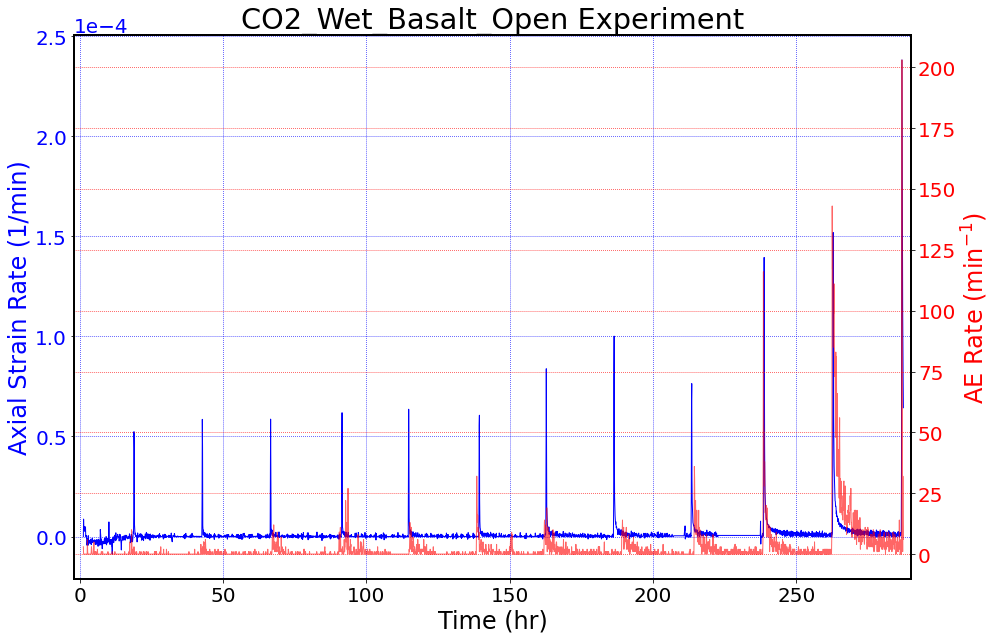

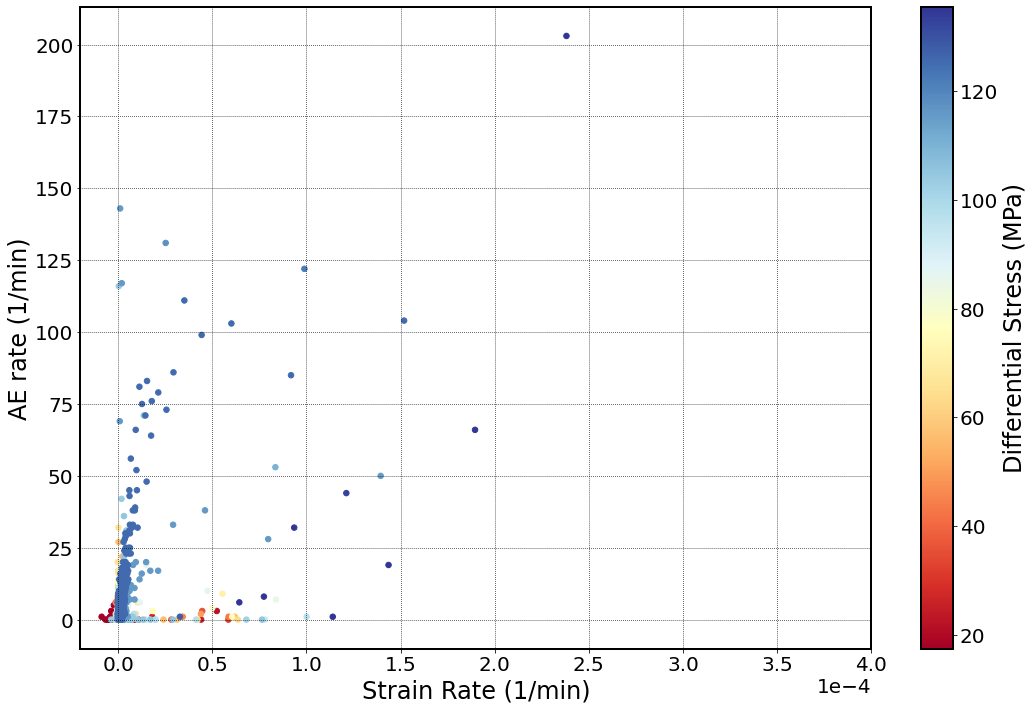

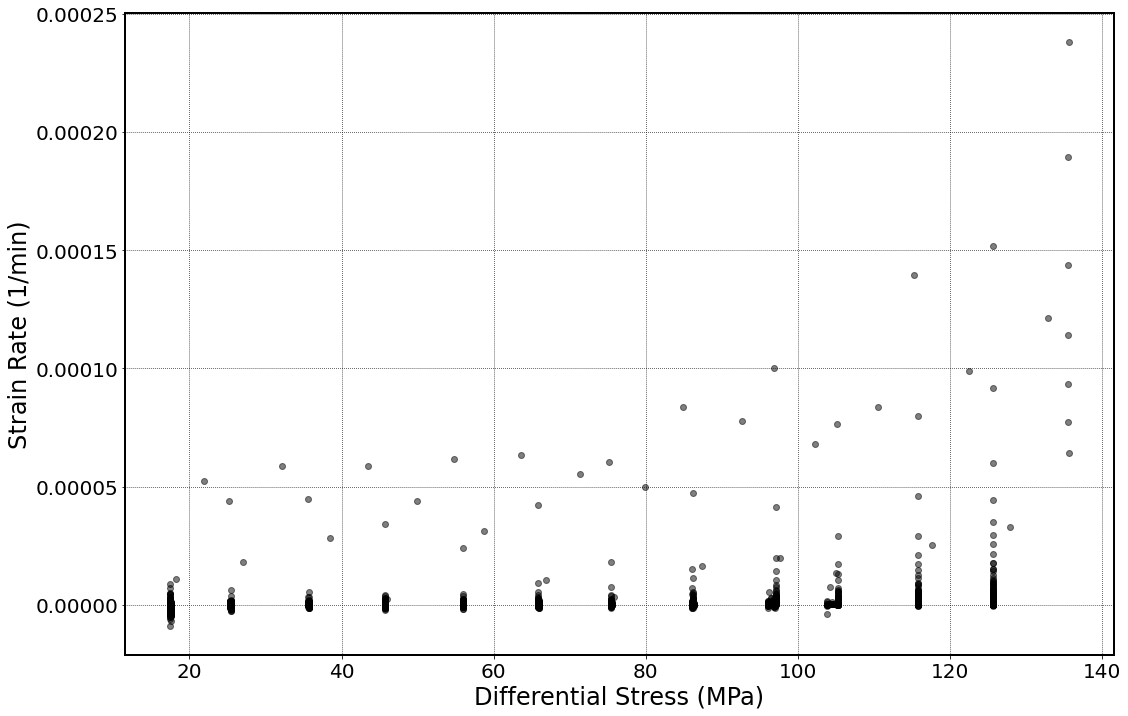

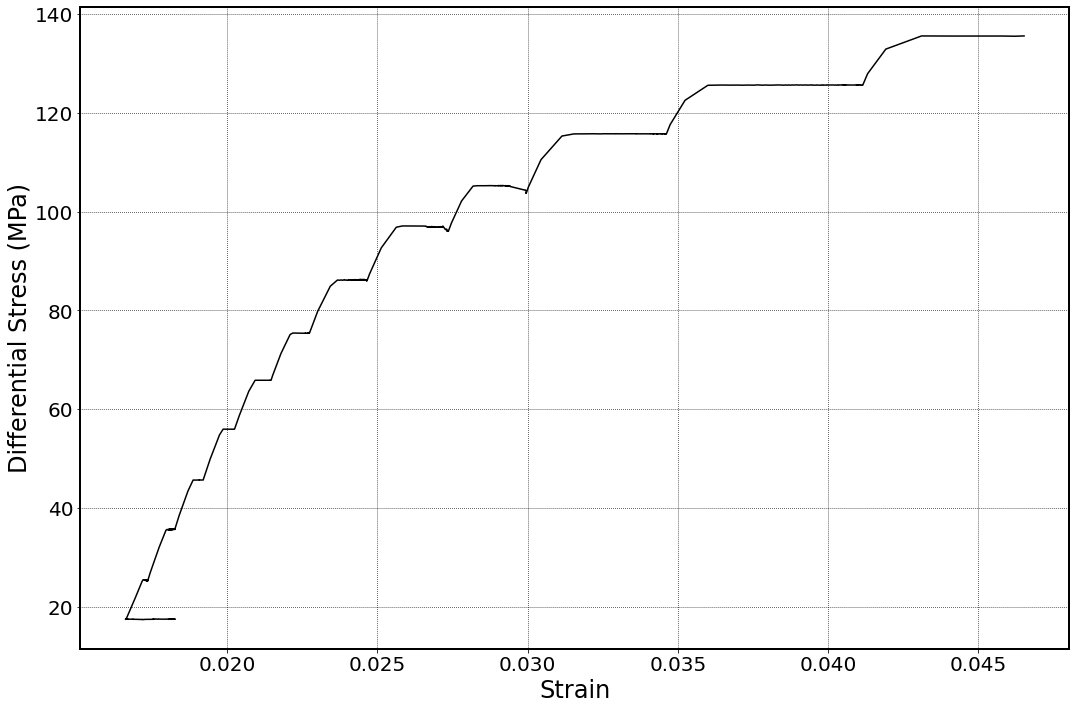

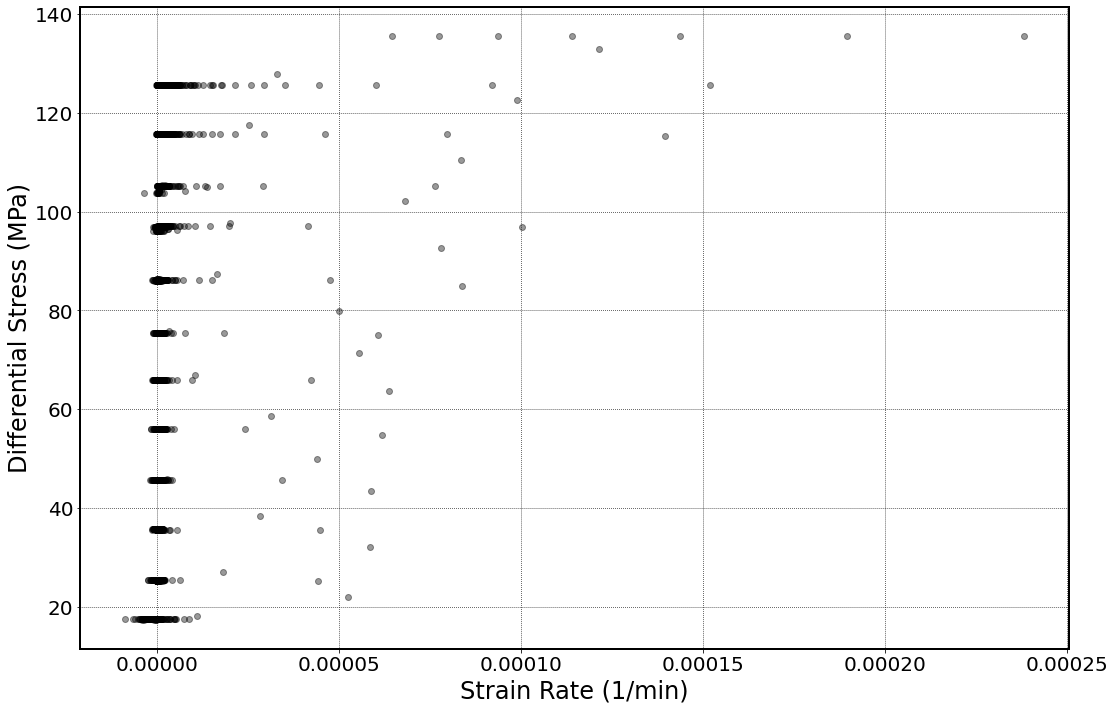

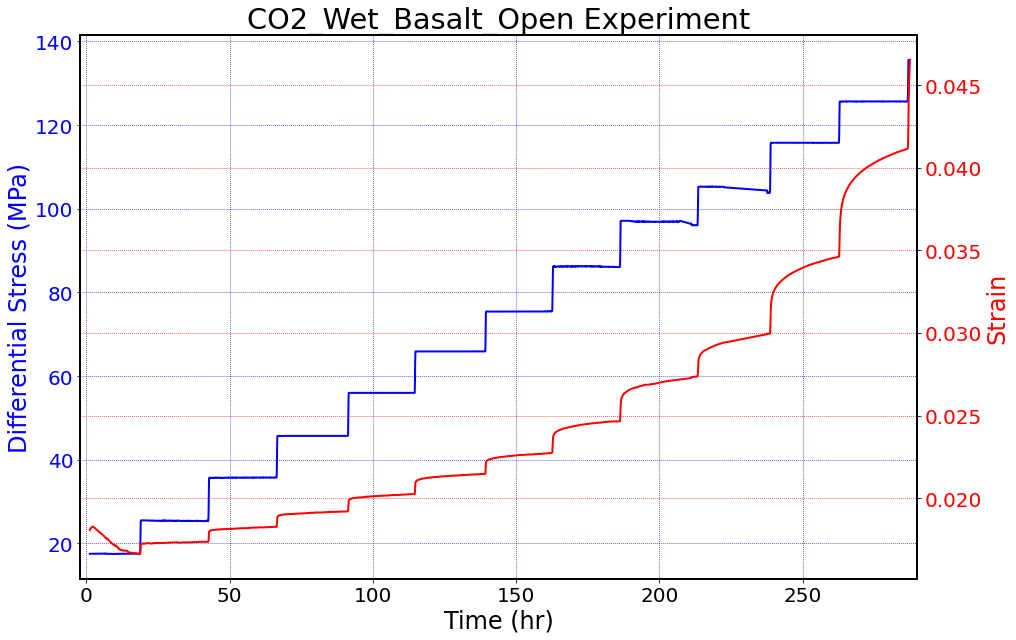

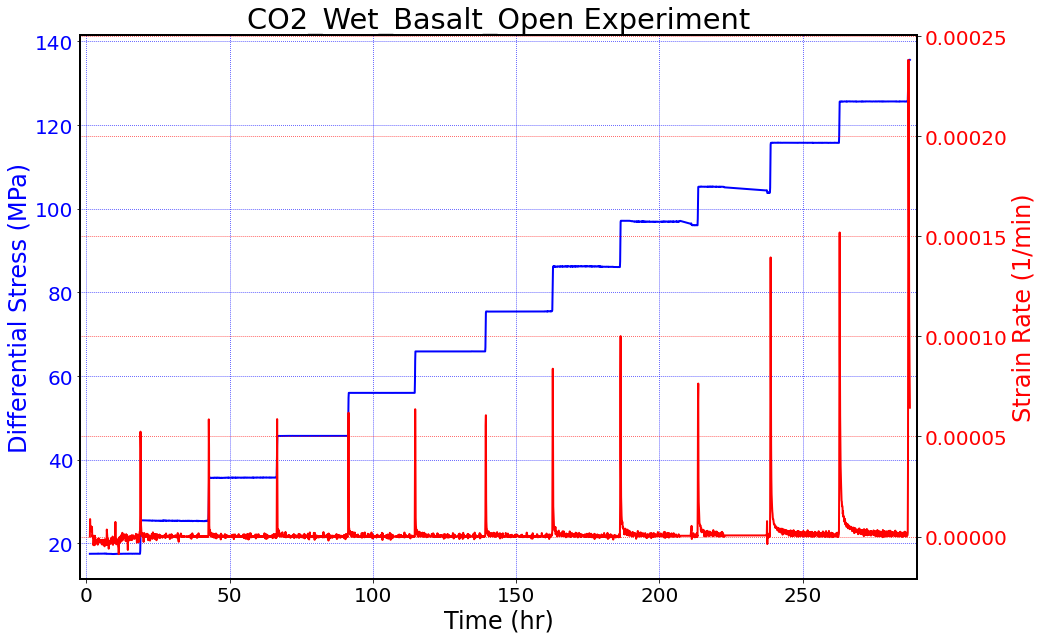

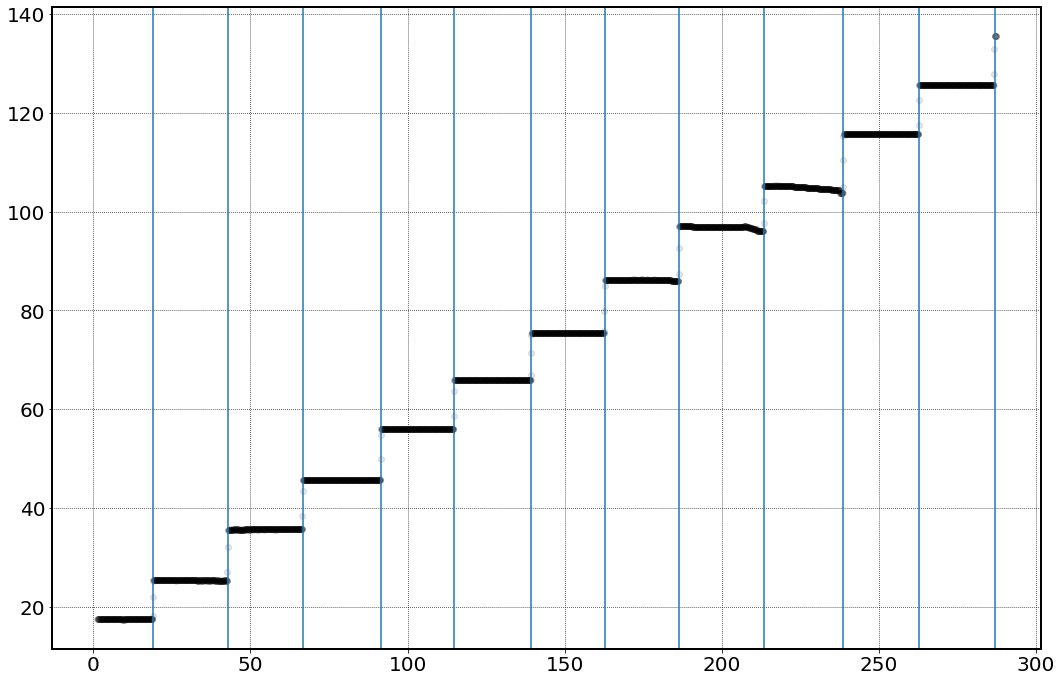

In [30]:
time_window = 300
time_agg = str(int(time_window/60)) + 'min'
new_data_def_Sampl = hbasic.generate_data(new_data,new_data_def,time_window,start_date,end_date)
print(new_data_def_Sampl.columns)
   
#new_data_def_Sampl = new_data_def_Sampl.loc[new_data_def_Sampl['time_hr']<=138.,:]
hbasic.make_plots_exp_Dataset(new_data_def_Sampl,name_exp,time_window,max_val=290,Temperature=False)

### Finding the steps in the stress based on stress rate
grad_stress = new_data_def_Sampl['stress_rate']
pot_steps = np.where(grad_stress>0.25)[0]
indx = np.hstack([0,np.where(np.diff(new_data_def_Sampl.time_hr[pot_steps])>5)[0],-1])
print('Index value for the stress steps: ' ,pot_steps[indx])
indx = np.hstack([indx[0],indx[2:]])
time_steps = new_data_def_Sampl.time_hr[pot_steps[indx]].reset_index(drop=True)
print('Time(hr) for the stress steps: ',time_steps.values)

plt.figure()
plt.plot(new_data_def_Sampl.time_hr,new_data_def_Sampl.Sig_diff_MPa,'-ko',linewidth=0.1,alpha=0.1)
for k in pot_steps[indx]:
    plt.axvline(x=new_data_def_Sampl.time_hr[k])

    
# import gc
# gc.collect()

scaled_data1 = MinMaxScaler().fit_transform(new_data_def_Sampl)
scaled_data2 = RobustScaler().fit_transform(new_data_def_Sampl)

hbasic.make_file(new_data_def_Sampl,scaled_data1,path_save_file+'MinMax')
hbasic.make_file(new_data_def_Sampl,scaled_data2,path_save_file+'Robust')
del new_data_def_Sampl;

gc.collect()


Index(['Disp_mm', 'Sig_diff_MPa', 'P_confining', 'P_fluid', 't_def',
       'Strain_ax', 'time_hr', 'Time_Since_Step_1', 'Time_Since_Step_2',
       'Time_Since_Step_3', 'Time_Since_Step_4', 'Time_Since_Step_5',
       'Time_Since_Step_6', 'Time_Since_Step_7', 'Time_Since_Step_8',
       'Time_Since_Step_9', 'Time_Since_Step_10', 'Time_Since_Step_11',
       'Time_Since_Step_12', 'AE_rate_count', 'strain_rate', 'stress_rate',
       'AE_rate_count_rate', 'Sig_AE_rate', 'strain_rate_AE_rate',
       'strain_AE_rate', 'Sig_strain', 'Sig_strain_rate',
       'Strain_strain_rate'],
      dtype='object')
Output_Plots Exists
Output_Plots/CO2_Wet_Basalt_Open Exists
Index value for the stress steps:  [ 106  107  250  393  542  682  829  970 1111 1274 1426 1570 1714]
Time(hr) for the stress steps:  [ 18.90486111  42.90486111  66.73819444  91.57152778 114.90486111
 139.40486111 162.90486111 186.40486111 213.57152778 238.90486111
 262.90486111 286.90486111]


47392

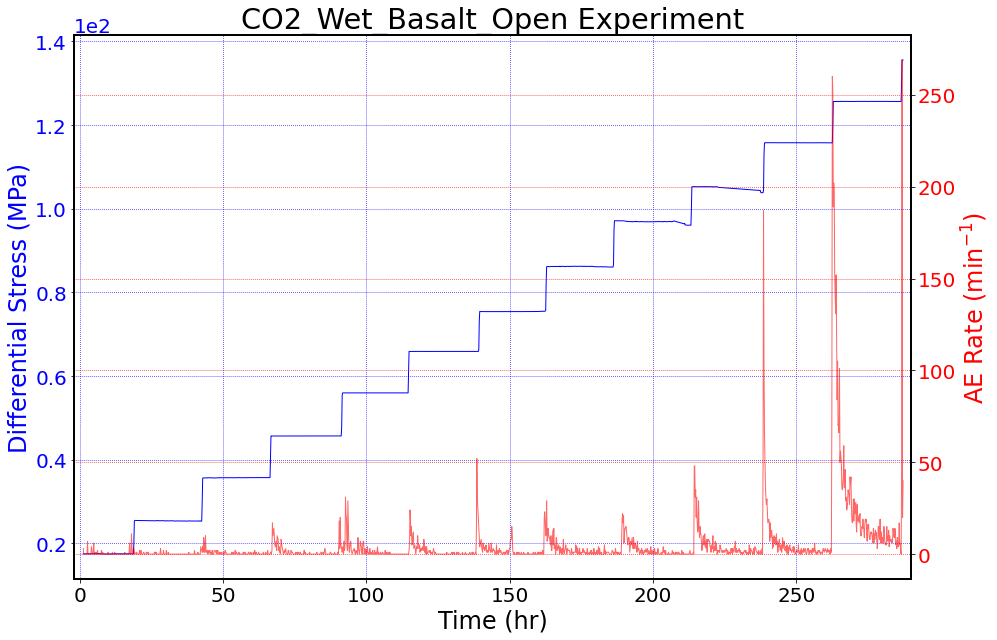

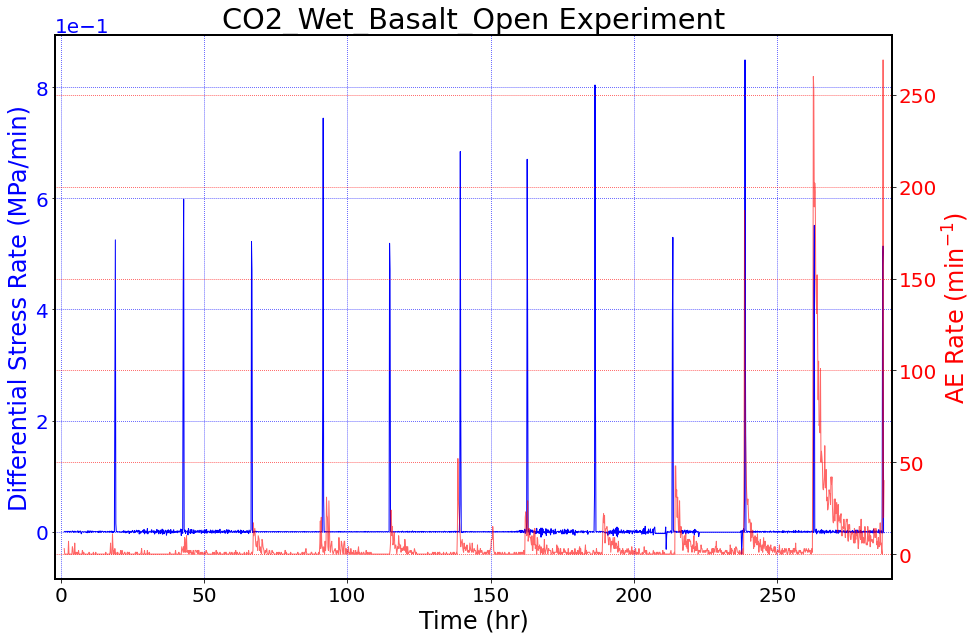

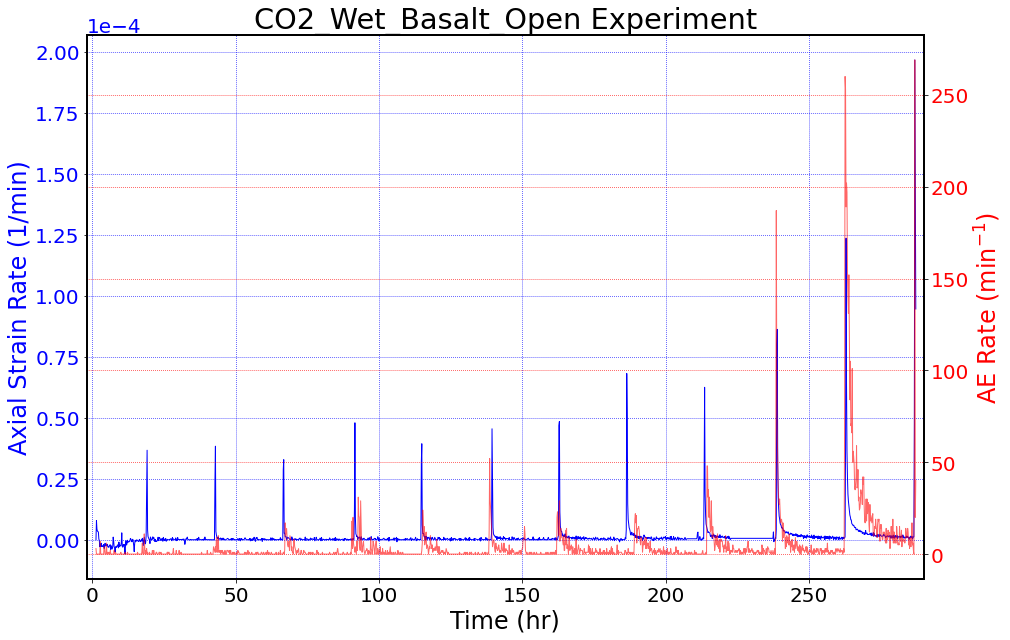

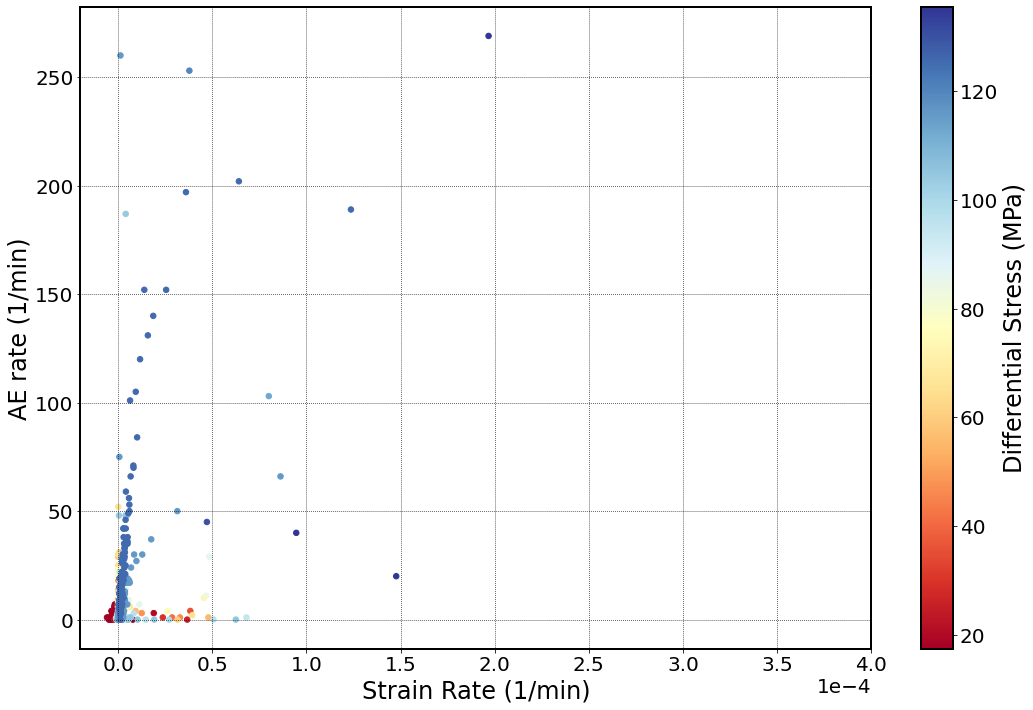

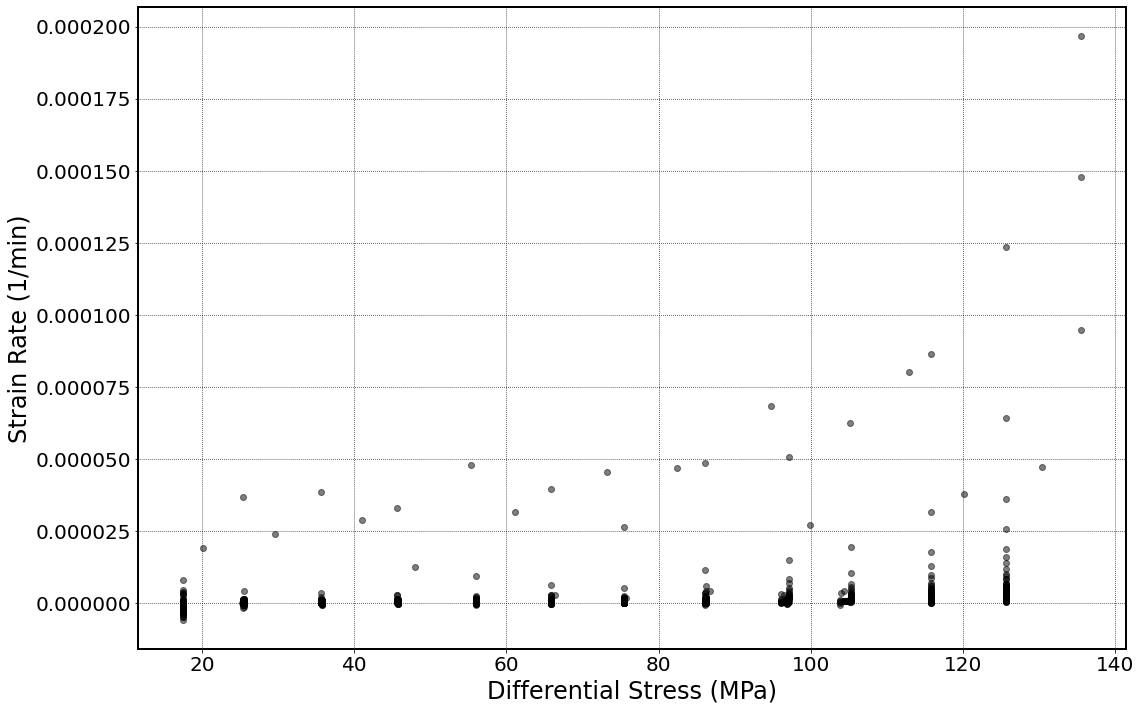

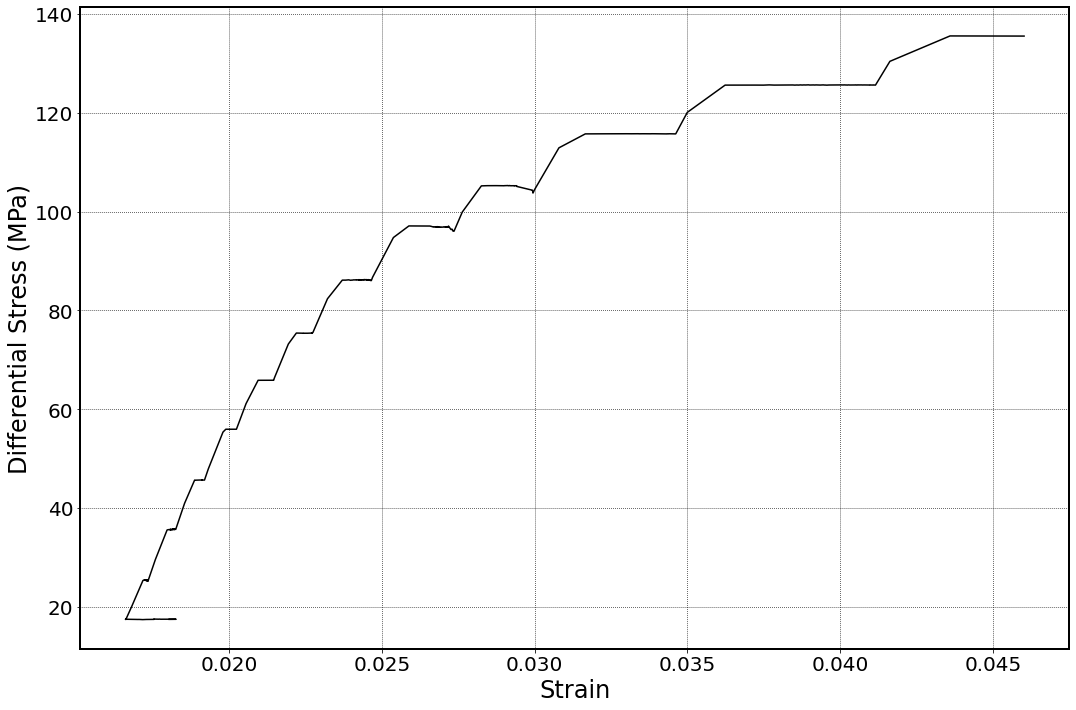

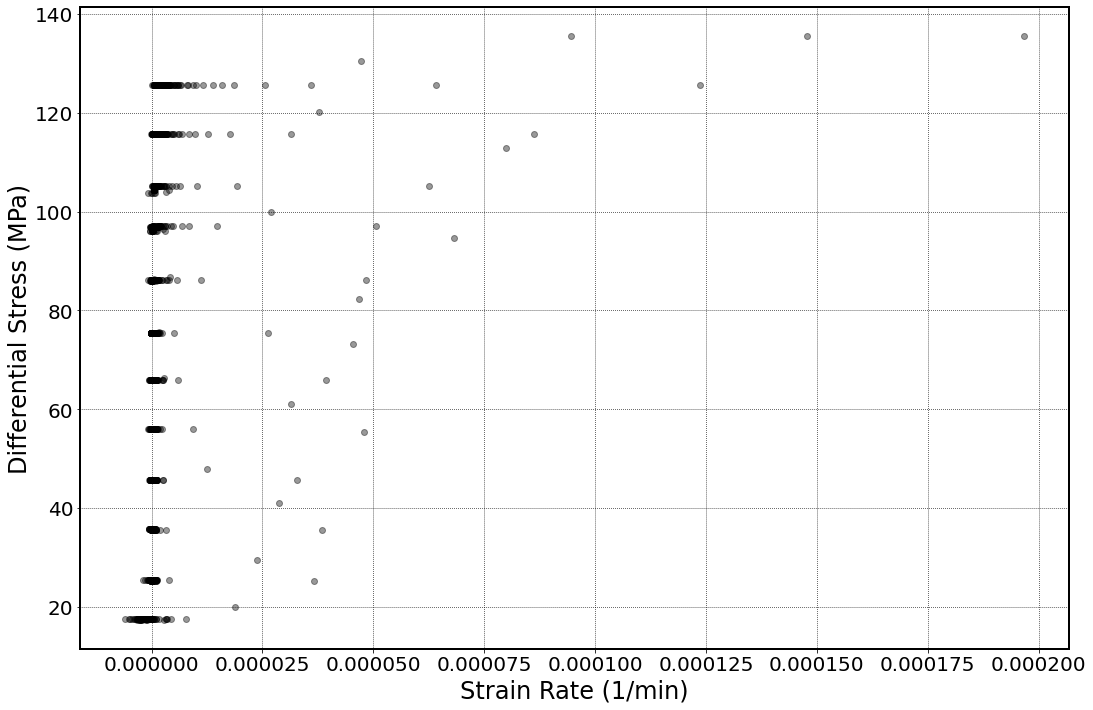

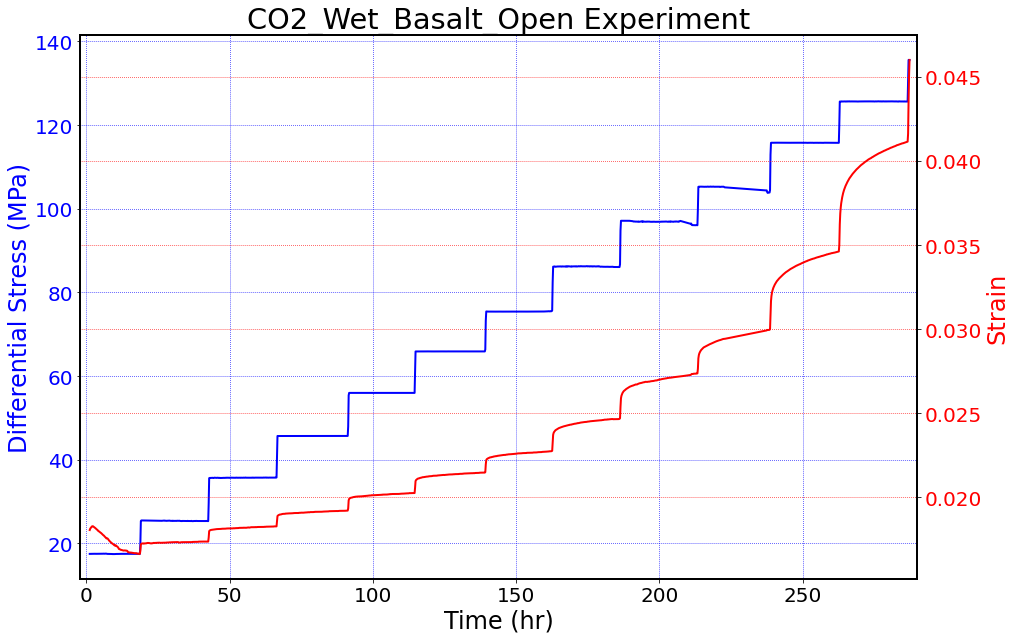

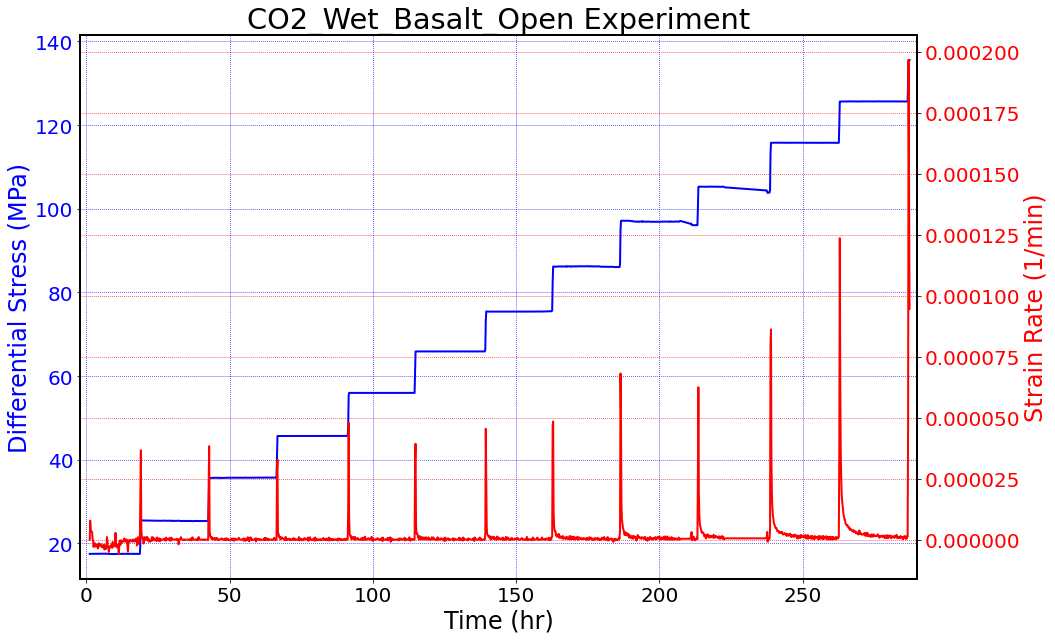

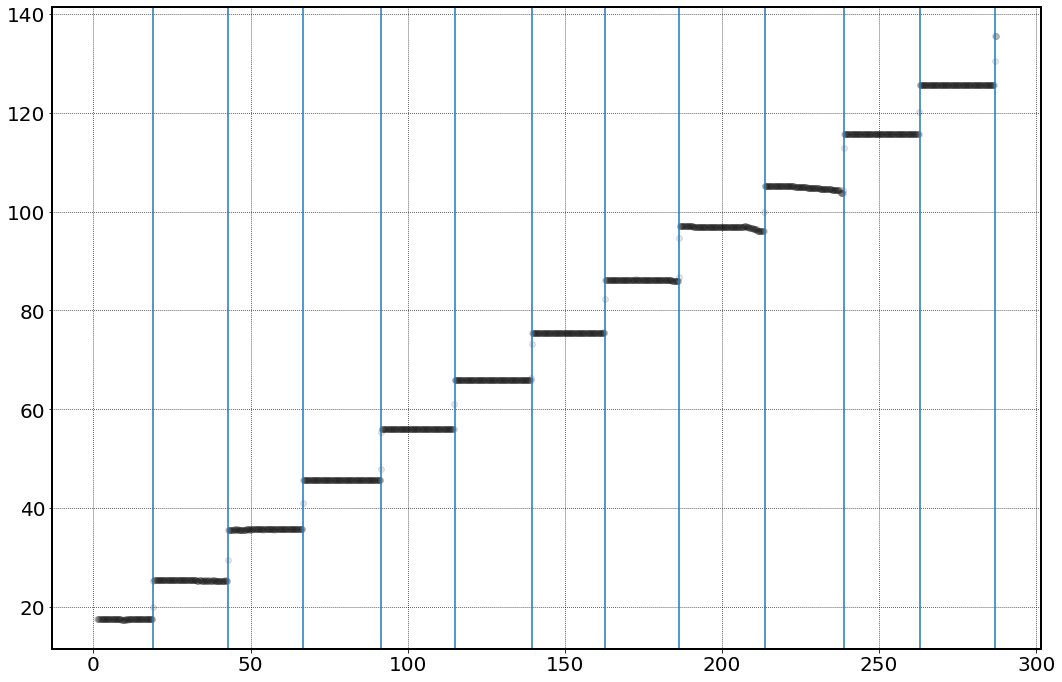

In [31]:
time_window = 600
time_agg = str(int(time_window/60)) + 'min'
new_data_def_Sampl = hbasic.generate_data(new_data,new_data_def,time_window,start_date,end_date)
print(new_data_def_Sampl.columns)
   
#new_data_def_Sampl = new_data_def_Sampl.loc[new_data_def_Sampl['time_hr']<=138.,:]
hbasic.make_plots_exp_Dataset(new_data_def_Sampl,name_exp,
                              time_window,max_val=290,Temperature=False)

### Finding the steps in the stress based on stress rate
grad_stress = new_data_def_Sampl['stress_rate']
pot_steps = np.where(grad_stress>0.25)[0]
indx = np.hstack([0,np.where(np.diff(new_data_def_Sampl.time_hr[pot_steps])>5)[0],-1])
print('Index value for the stress steps: ' ,pot_steps[indx])
indx = np.hstack([indx[0],indx[2:]])
time_steps = new_data_def_Sampl.time_hr[pot_steps[indx]].reset_index(drop=True)
print('Time(hr) for the stress steps: ',time_steps.values)

plt.figure()
plt.plot(new_data_def_Sampl.time_hr,new_data_def_Sampl.Sig_diff_MPa,'-ko',linewidth=0.1,alpha=0.1)
for k in pot_steps[indx]:
    plt.axvline(x=new_data_def_Sampl.time_hr[k])

    
# import gc
# gc.collect()

scaled_data1 = MinMaxScaler().fit_transform(new_data_def_Sampl)
scaled_data2 = RobustScaler().fit_transform(new_data_def_Sampl)

hbasic.make_file(new_data_def_Sampl,scaled_data1,path_save_file+'MinMax')
hbasic.make_file(new_data_def_Sampl,scaled_data2,path_save_file+'Robust')
del new_data_def_Sampl;

gc.collect()
